In [1]:
import torch
import numpy as np

torch.__version__

'1.0.1.post2'

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

batch = 16

transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train= True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train= False, download = True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch)

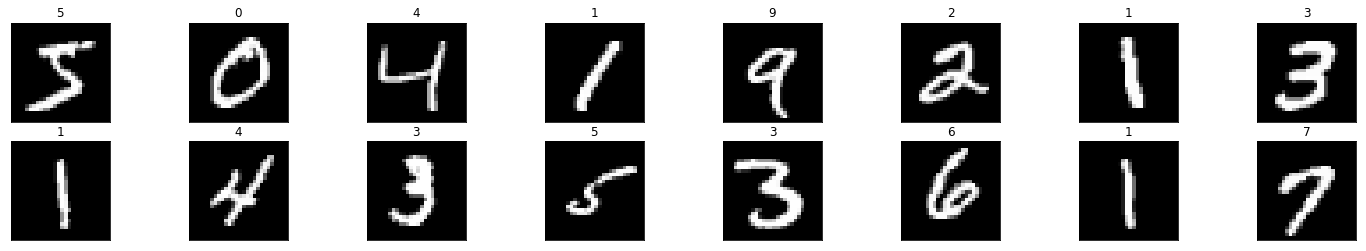

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super (Net, self).__init__()
        hidden_1 = 32
        hidden_2 = 32
        self.fc1 = nn.Linear(784, hidden_1)          #fcl is a fully connected layer
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)           #10 is so it does a softmax at last
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)           #Using Stochastic Gradient Decent 

In [6]:
n_epochs = 10
model.train()

for epoch in range(n_epochs):
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        
        print('Epoch: ', epoch, train_loss/len(train_loader.dataset))

Epoch:  0 0.0006255860646565755
Epoch:  0 0.0012367048263549805
Epoch:  0 0.001851149559020996
Epoch:  0 0.0024493664423624675
Epoch:  0 0.0030774885177612303
Epoch:  0 0.0036800380706787108
Epoch:  0 0.004307772382100423
Epoch:  0 0.00492652759552002
Epoch:  0 0.005545742416381836
Epoch:  0 0.0061583782196044925
Epoch:  0 0.006769360987345378
Epoch:  0 0.007392867851257324
Epoch:  0 0.008012665112813315
Epoch:  0 0.008635309410095215
Epoch:  0 0.00925507074991862
Epoch:  0 0.00987553621927897
Epoch:  0 0.010495539156595866
Epoch:  0 0.011112317593892416
Epoch:  0 0.011721373748779297
Epoch:  0 0.012343935839335124
Epoch:  0 0.01296063969930013
Epoch:  0 0.01357163054148356
Epoch:  0 0.014188527870178222
Epoch:  0 0.014802419471740722
Epoch:  0 0.015425003623962402
Epoch:  0 0.016046044794718425
Epoch:  0 0.016654453722635906
Epoch:  0 0.017271960004170736
Epoch:  0 0.01789107074737549
Epoch:  0 0.018517595227559407
Epoch:  0 0.019135353787740072
Epoch:  0 0.019767195002237954
Epoch:  

Epoch:  0 0.18610750681559246
Epoch:  0 0.18673076915740966
Epoch:  0 0.1873506830851237
Epoch:  0 0.18796154085795086
Epoch:  0 0.18857203890482585
Epoch:  0 0.18918860308329263
Epoch:  0 0.18980395418802898
Epoch:  0 0.1904154359181722
Epoch:  0 0.19103952624003093
Epoch:  0 0.19166743761698404
Epoch:  0 0.19228822606404622
Epoch:  0 0.1929112075805664
Epoch:  0 0.1935254400253296
Epoch:  0 0.1941341204961141
Epoch:  0 0.1947449316660563
Epoch:  0 0.1953669553120931
Epoch:  0 0.1959882407506307
Epoch:  0 0.1965977070490519
Epoch:  0 0.19721172841389975
Epoch:  0 0.19781665503184
Epoch:  0 0.1984170815149943
Epoch:  0 0.19903336639404298
Epoch:  0 0.19965525302886963
Epoch:  0 0.20026644503275554
Epoch:  0 0.200880517578125
Epoch:  0 0.20147811158498127
Epoch:  0 0.2021045362472534
Epoch:  0 0.20273000367482502
Epoch:  0 0.2033308484395345
Epoch:  0 0.20393930854797362
Epoch:  0 0.20456671574910482
Epoch:  0 0.20516984513600667
Epoch:  0 0.20577504927317303
Epoch:  0 0.206392079607645

Epoch:  0 0.3814610960006714
Epoch:  0 0.38206213461558025
Epoch:  0 0.3826746176401774
Epoch:  0 0.3832886059443156
Epoch:  0 0.3838972230911255
Epoch:  0 0.3845119827906291
Epoch:  0 0.385131857808431
Epoch:  0 0.3857423128128052
Epoch:  0 0.3863447494506836
Epoch:  0 0.386973424911499
Epoch:  0 0.38759240430196124
Epoch:  0 0.3882075729370117
Epoch:  0 0.3888137648264567
Epoch:  0 0.38942479820251463
Epoch:  0 0.3900304039637248
Epoch:  0 0.39065220387776695
Epoch:  0 0.3912597592671712
Epoch:  0 0.3918716090520223
Epoch:  0 0.3924823267618815
Epoch:  0 0.39309013646443686
Epoch:  0 0.39369551289876303
Epoch:  0 0.3943085039138794
Epoch:  0 0.39492100353240966
Epoch:  0 0.3955388740539551
Epoch:  0 0.39615017471313474
Epoch:  0 0.3967581696828206
Epoch:  0 0.39736250031789144
Epoch:  0 0.3979690228144328
Epoch:  0 0.3985838513056437
Epoch:  0 0.3991915596644084
Epoch:  0 0.3998126775105794
Epoch:  0 0.40043646952311196
Epoch:  0 0.4010500138600667
Epoch:  0 0.401658339436849
Epoch: 

Epoch:  0 0.5581691728591919
Epoch:  0 0.5587810836791992
Epoch:  0 0.5593928121566772
Epoch:  0 0.5599961340586345
Epoch:  0 0.5606124703089396
Epoch:  0 0.5612257587432862
Epoch:  0 0.5618429529190063
Epoch:  0 0.5624526933670044
Epoch:  0 0.5630599779129029
Epoch:  0 0.5636712891260783
Epoch:  0 0.5642854412078857
Epoch:  0 0.5649090427398682
Epoch:  0 0.5655139436086019
Epoch:  0 0.5661310495376587
Epoch:  0 0.5667504899342855
Epoch:  0 0.567351771291097
Epoch:  0 0.5679597770690918
Epoch:  0 0.5685650946299236
Epoch:  0 0.5691741960525513
Epoch:  0 0.5697918170293172
Epoch:  0 0.5704144788106282
Epoch:  0 0.571031062189738
Epoch:  0 0.5716379673639933
Epoch:  0 0.5722520249684652
Epoch:  0 0.5728614817301432
Epoch:  0 0.5734670472462972
Epoch:  0 0.5740817847569784
Epoch:  0 0.5746890654246012
Epoch:  0 0.575288262240092
Epoch:  0 0.5759109746297201
Epoch:  0 0.5765197308858235
Epoch:  0 0.5771247393290202
Epoch:  0 0.5777356349309285
Epoch:  0 0.5783526393254598
Epoch:  0 0.57896

Epoch:  0 0.756118304570516
Epoch:  0 0.756730759938558
Epoch:  0 0.7573288632710775
Epoch:  0 0.757926126797994
Epoch:  0 0.7585253213882446
Epoch:  0 0.7591303359349568
Epoch:  0 0.7597424784978231
Epoch:  0 0.760357327524821
Epoch:  0 0.7609628828048706
Epoch:  0 0.7615640810648601
Epoch:  0 0.7621811686833699
Epoch:  0 0.762787933921814
Epoch:  0 0.7633945597966512
Epoch:  0 0.7640147209803263
Epoch:  0 0.7646202191670736
Epoch:  0 0.765227935218811
Epoch:  0 0.7658356267293295
Epoch:  0 0.7664416444778442
Epoch:  0 0.7670594113032023
Epoch:  0 0.7676979507446289
Epoch:  0 0.7682937138875325
Epoch:  0 0.7689016965866089
Epoch:  0 0.7695124210993449
Epoch:  0 0.770130725924174
Epoch:  0 0.770726688448588
Epoch:  0 0.7713261704126994
Epoch:  0 0.7719264078140259
Epoch:  0 0.7725254872004191
Epoch:  0 0.7731371646881103
Epoch:  0 0.7737475282669067
Epoch:  0 0.7743547705968221
Epoch:  0 0.7749547499974568
Epoch:  0 0.77555189259847
Epoch:  0 0.7761618852615356
Epoch:  0 0.776768774223

Epoch:  0 0.9334974448521932
Epoch:  0 0.9340974168777466
Epoch:  0 0.9346928953170777
Epoch:  0 0.9352940298716227
Epoch:  0 0.9358883984883626
Epoch:  0 0.9364875173568725
Epoch:  0 0.9370933350245158
Epoch:  0 0.9376902992248535
Epoch:  0 0.9382979697545369
Epoch:  0 0.9389095422108968
Epoch:  0 0.9395111307144165
Epoch:  0 0.9401092376708985
Epoch:  0 0.940710446357727
Epoch:  0 0.9413167414347331
Epoch:  0 0.9419228099822998
Epoch:  0 0.9425372628529867
Epoch:  0 0.9431362759272257
Epoch:  0 0.9437299231847127
Epoch:  0 0.9443401116053264
Epoch:  0 0.9449516396840414
Epoch:  0 0.9455499477386474
Epoch:  0 0.9461451485315958
Epoch:  0 0.9467483322143555
Epoch:  0 0.9473614906311035
Epoch:  0 0.947967173131307
Epoch:  0 0.9485791809717814
Epoch:  0 0.9491770375569661
Epoch:  0 0.9497851934432984
Epoch:  0 0.950389658164978
Epoch:  0 0.9509962806065877
Epoch:  0 0.9516084618886311
Epoch:  0 0.952207741800944
Epoch:  0 0.9528138392766317
Epoch:  0 0.9534053753534952
Epoch:  0 0.954013

Epoch:  0 1.1151238072713217
Epoch:  0 1.1157327695210775
Epoch:  0 1.1163301354090374
Epoch:  0 1.1169389226913453
Epoch:  0 1.1175397341410318
Epoch:  0 1.1181364513397216
Epoch:  0 1.1187379557291666
Epoch:  0 1.119326308186849
Epoch:  0 1.119918543434143
Epoch:  0 1.1205031614303589
Epoch:  0 1.1210863355636598
Epoch:  0 1.121682372601827
Epoch:  0 1.1222736825942994
Epoch:  0 1.1228556702931722
Epoch:  0 1.1234502386728922
Epoch:  0 1.1240301832199098
Epoch:  0 1.1246330839157104
Epoch:  0 1.1252403892517089
Epoch:  0 1.1258279147466024
Epoch:  0 1.1264130654652913
Epoch:  0 1.127011867459615
Epoch:  0 1.1276135288238525
Epoch:  0 1.1282201897939046
Epoch:  0 1.1288122826894125
Epoch:  0 1.1294095184326172
Epoch:  0 1.1300242674509684
Epoch:  0 1.1306236064910888
Epoch:  0 1.1312092135111491
Epoch:  0 1.131822114308675
Epoch:  0 1.1324207873662313
Epoch:  0 1.1330125035603842
Epoch:  0 1.1336220101038614
Epoch:  0 1.1342140239079794
Epoch:  0 1.1348277414957681
Epoch:  0 1.1354178

Epoch:  0 1.2974637990951539
Epoch:  0 1.2980721039454142
Epoch:  0 1.2986706439336142
Epoch:  0 1.2992623764038085
Epoch:  0 1.2998545302708944
Epoch:  0 1.3004496658325195
Epoch:  0 1.3010438137690226
Epoch:  0 1.3016268354415894
Epoch:  0 1.3022216821034749
Epoch:  0 1.3028100173314412
Epoch:  0 1.3033950073877971
Epoch:  0 1.304002464612325
Epoch:  0 1.3046000064214072
Epoch:  0 1.305172010421753
Epoch:  0 1.305753626569112
Epoch:  0 1.3063431681950888
Epoch:  0 1.306937444750468
Epoch:  0 1.3075393743515014
Epoch:  0 1.308131174914042
Epoch:  0 1.3087294682184856
Epoch:  0 1.3093282522837322
Epoch:  0 1.3099318957010906
Epoch:  0 1.3105128456115722
Epoch:  0 1.3110998516082764
Epoch:  0 1.3116844767252605
Epoch:  0 1.312270311164856
Epoch:  0 1.312854058456421
Epoch:  0 1.3134554909388225
Epoch:  0 1.3140497561136881
Epoch:  0 1.3146428106307984
Epoch:  0 1.3152346199035645
Epoch:  0 1.3158271951675415
Epoch:  0 1.3164176500320435
Epoch:  0 1.31700405737559
Epoch:  0 1.31761054871

Epoch:  0 1.467295644569397
Epoch:  0 1.4678842254002888
Epoch:  0 1.46847450726827
Epoch:  0 1.469068900871277
Epoch:  0 1.469676974550883
Epoch:  0 1.4702653306325277
Epoch:  0 1.47086121412913
Epoch:  0 1.4714537654240927
Epoch:  0 1.4720457037607828
Epoch:  0 1.4726147963841756
Epoch:  0 1.473184006690979
Epoch:  0 1.4737782641092936
Epoch:  0 1.4743602736155192
Epoch:  0 1.4749512976964314
Epoch:  0 1.4755397855758667
Epoch:  0 1.4761301957448323
Epoch:  0 1.4767251437505087
Epoch:  0 1.477304256884257
Epoch:  0 1.4779077266693115
Epoch:  0 1.478469936243693
Epoch:  0 1.4790385122934977
Epoch:  0 1.4796380539576213
Epoch:  0 1.4802234648386636
Epoch:  0 1.4808125048319498
Epoch:  0 1.4813918128967285
Epoch:  0 1.4819936546325683
Epoch:  0 1.4825938496271769
Epoch:  0 1.4831672061284382
Epoch:  0 1.4837452114105225
Epoch:  0 1.4843344165802002
Epoch:  0 1.484904726600647
Epoch:  0 1.4854851629892984
Epoch:  0 1.4860583895365398
Epoch:  0 1.4866434652964273
Epoch:  0 1.4872374511718

Epoch:  0 1.6402655922571818
Epoch:  0 1.6408287455240886
Epoch:  0 1.6414104813257853
Epoch:  0 1.6420000925064087
Epoch:  0 1.6426055662155152
Epoch:  0 1.6432124570846558
Epoch:  0 1.6437885388056437
Epoch:  0 1.6443678590774535
Epoch:  0 1.6449587329228719
Epoch:  0 1.6455383775711059
Epoch:  0 1.6461068625768025
Epoch:  0 1.646685789044698
Epoch:  0 1.6472766408284505
Epoch:  0 1.6478675380706787
Epoch:  0 1.648437167231242
Epoch:  0 1.64902157497406
Epoch:  0 1.6496089427947997
Epoch:  0 1.6501844119389852
Epoch:  0 1.6507608430226643
Epoch:  0 1.6513590693155924
Epoch:  0 1.651952490234375
Epoch:  0 1.652548273340861
Epoch:  0 1.6531405537923176
Epoch:  0 1.6537370179494222
Epoch:  0 1.654318973795573
Epoch:  0 1.6549162895202636
Epoch:  0 1.655506681696574
Epoch:  0 1.6560911218643188
Epoch:  0 1.6566856101353964
Epoch:  0 1.6572573336283365
Epoch:  0 1.6578404155731201
Epoch:  0 1.6584380591710408
Epoch:  0 1.6590114121754964
Epoch:  0 1.6595786098480225
Epoch:  0 1.6601750410

Epoch:  0 1.8356574740727742
Epoch:  0 1.8362310750325521
Epoch:  0 1.8368152322769165
Epoch:  0 1.8373887762705485
Epoch:  0 1.837979236984253
Epoch:  0 1.8385595218022663
Epoch:  0 1.8391463338851928
Epoch:  0 1.8397263531366983
Epoch:  0 1.8403193172454835
Epoch:  0 1.8409127330144246
Epoch:  0 1.8414938347498575
Epoch:  0 1.8420744568506877
Epoch:  0 1.8426532665252686
Epoch:  0 1.843252807044983
Epoch:  0 1.8438348655700683
Epoch:  0 1.8443905630747477
Epoch:  0 1.8449817454020183
Epoch:  0 1.8455621763865153
Epoch:  0 1.846153323173523
Epoch:  0 1.8467348358154296
Epoch:  0 1.8473203886032104
Epoch:  0 1.8478863883972168
Epoch:  0 1.8484701792399088
Epoch:  0 1.8490610961914062
Epoch:  0 1.849611026573181
Epoch:  0 1.8501910921732585
Epoch:  0 1.8507564431508383
Epoch:  0 1.8513326944986979
Epoch:  0 1.8519100462595621
Epoch:  0 1.8524576754887898
Epoch:  0 1.853037757873535
Epoch:  0 1.8536018046061198
Epoch:  0 1.854151064300537
Epoch:  0 1.854731661160787
Epoch:  0 1.855290037

Epoch:  0 2.003110587088267
Epoch:  0 2.0036567974408466
Epoch:  0 2.0042090377489727
Epoch:  0 2.0047863024711607
Epoch:  0 2.0053590250968933
Epoch:  0 2.0059391016960144
Epoch:  0 2.006507080427806
Epoch:  0 2.007098118686676
Epoch:  0 2.007687663046519
Epoch:  0 2.008268595600128
Epoch:  0 2.008824120680491
Epoch:  0 2.009382182153066
Epoch:  0 2.009946307849884
Epoch:  0 2.010534045823415
Epoch:  0 2.0111231516838073
Epoch:  0 2.011698768011729
Epoch:  0 2.0122758207003275
Epoch:  0 2.0128184587160747
Epoch:  0 2.0134052205085755
Epoch:  0 2.0139832156181336
Epoch:  0 2.0145608084042865
Epoch:  0 2.015132713794708
Epoch:  0 2.015692997392019
Epoch:  0 2.0162475906689963
Epoch:  0 2.0167858478864034
Epoch:  0 2.017356183719635
Epoch:  0 2.017902552509308
Epoch:  0 2.0184736025810244
Epoch:  0 2.0190403389930727
Epoch:  0 2.0196278512001036
Epoch:  0 2.020209692287445
Epoch:  0 2.020774023850759
Epoch:  0 2.021358071168264
Epoch:  0 2.0219528741518658
Epoch:  0 2.0225485155423484
Ep

Epoch:  0 2.177940193208059
Epoch:  0 2.1784729219754535
Epoch:  0 2.179029832172394
Epoch:  0 2.1795777356147767
Epoch:  0 2.1801512298266092
Epoch:  0 2.1807223335584003
Epoch:  0 2.1812786628405254
Epoch:  0 2.1818538919766746
Epoch:  0 2.1824198879559833
Epoch:  0 2.182981813589732
Epoch:  0 2.1835586606661477
Epoch:  0 2.18413313703537
Epoch:  0 2.184686379782359
Epoch:  0 2.1852550969759625
Epoch:  0 2.1858180134137473
Epoch:  0 2.186382503223419
Epoch:  0 2.1869467382113137
Epoch:  0 2.187512080860138
Epoch:  0 2.188070682621002
Epoch:  0 2.188607956091563
Epoch:  0 2.1891767250378926
Epoch:  0 2.1897538816134134
Epoch:  0 2.1903133243878683
Epoch:  0 2.190907687664032
Epoch:  0 2.1914553787549336
Epoch:  0 2.1920028431892393
Epoch:  0 2.1925673124631246
Epoch:  0 2.193120980358124
Epoch:  0 2.1936592575391134
Epoch:  0 2.194192751979828
Epoch:  0 2.194739961528778
Epoch:  0 2.195295159562429
Epoch:  0 2.195873440011342
Epoch:  0 2.196445145638784
Epoch:  0 2.19697386487325
Epoc

Epoch:  1 0.12887101113001506
Epoch:  1 0.12942708520889282
Epoch:  1 0.1300099020957947
Epoch:  1 0.13056927467981974
Epoch:  1 0.1310644362449646
Epoch:  1 0.13163846883773803
Epoch:  1 0.13218050832748413
Epoch:  1 0.1327385270754496
Epoch:  1 0.1332868400255839
Epoch:  1 0.1338589451154073
Epoch:  1 0.1343779609044393
Epoch:  1 0.1349179251352946
Epoch:  1 0.13547177441914876
Epoch:  1 0.13602412376403808
Epoch:  1 0.13654735660552977
Epoch:  1 0.13709428259531656
Epoch:  1 0.1376794293721517
Epoch:  1 0.13824432678222656
Epoch:  1 0.1387792210261027
Epoch:  1 0.13930039552052817
Epoch:  1 0.13985218601226806
Epoch:  1 0.14043850746154785
Epoch:  1 0.14098502801259358
Epoch:  1 0.14153245480855306
Epoch:  1 0.14209636363983155
Epoch:  1 0.14262466529210407
Epoch:  1 0.14320553782780965
Epoch:  1 0.14374467617670694
Epoch:  1 0.14433212315241495
Epoch:  1 0.14489308087031047
Epoch:  1 0.14542178395589192
Epoch:  1 0.14592035897572836
Epoch:  1 0.1464716013590495
Epoch:  1 0.14700800

Epoch:  1 0.28142720912297564
Epoch:  1 0.2819765774091085
Epoch:  1 0.28248874107996624
Epoch:  1 0.2830725395520528
Epoch:  1 0.28356601305007934
Epoch:  1 0.2840942448933919
Epoch:  1 0.2846097566286723
Epoch:  1 0.285129453086853
Epoch:  1 0.28567480169932047
Epoch:  1 0.28619676354726153
Epoch:  1 0.2867211803436279
Epoch:  1 0.2872621660868327
Epoch:  1 0.2878168677647909
Epoch:  1 0.28838556804656984
Epoch:  1 0.28897668469746907
Epoch:  1 0.28952027269999187
Epoch:  1 0.2900379335085551
Epoch:  1 0.2905591684023539
Epoch:  1 0.2911112144788106
Epoch:  1 0.2916257306098938
Epoch:  1 0.2921262149175008
Epoch:  1 0.2926554916063944
Epoch:  1 0.29319970382054644
Epoch:  1 0.29375970398585
Epoch:  1 0.29430462096532184
Epoch:  1 0.29482970062891645
Epoch:  1 0.2953748433748881
Epoch:  1 0.29593616654078164
Epoch:  1 0.2965082657178243
Epoch:  1 0.29700977423985797
Epoch:  1 0.2975722102165222
Epoch:  1 0.2981590645154317
Epoch:  1 0.2986978407859802
Epoch:  1 0.2992434271812439
Epoc

Epoch:  1 0.43306420729955036
Epoch:  1 0.4335520412127177
Epoch:  1 0.43409981870651243
Epoch:  1 0.43468139651616416
Epoch:  1 0.43518733307520546
Epoch:  1 0.43574172671635947
Epoch:  1 0.4362686882336934
Epoch:  1 0.4368029612541199
Epoch:  1 0.43732651561101277
Epoch:  1 0.43783576221466064
Epoch:  1 0.4384034190495809
Epoch:  1 0.43894329668680826
Epoch:  1 0.4395103883743286
Epoch:  1 0.4400744139353434
Epoch:  1 0.44060011116663617
Epoch:  1 0.44113118642171223
Epoch:  1 0.4416345761299133
Epoch:  1 0.4421410174687703
Epoch:  1 0.4426961835861206
Epoch:  1 0.44317805668512983
Epoch:  1 0.44370030638376873
Epoch:  1 0.4442214302698771
Epoch:  1 0.4447519521713257
Epoch:  1 0.4453152774810791
Epoch:  1 0.4458482787132263
Epoch:  1 0.4463827003796895
Epoch:  1 0.44691413075129194
Epoch:  1 0.4473623130162557
Epoch:  1 0.44783028685251874
Epoch:  1 0.44833499857584636
Epoch:  1 0.4489269088745117
Epoch:  1 0.4494692430496216
Epoch:  1 0.44997474269866944
Epoch:  1 0.450526753997802

Epoch:  1 0.5836318143526713
Epoch:  1 0.5841674572944641
Epoch:  1 0.5846773454348246
Epoch:  1 0.5852105287233988
Epoch:  1 0.5857377583185832
Epoch:  1 0.5862636219978332
Epoch:  1 0.5867667670885722
Epoch:  1 0.5872663744926453
Epoch:  1 0.587750828965505
Epoch:  1 0.5883270155906677
Epoch:  1 0.5888730328559876
Epoch:  1 0.5893932022094727
Epoch:  1 0.5899456403096517
Epoch:  1 0.5905020840962728
Epoch:  1 0.5910637055714925
Epoch:  1 0.5916143946965535
Epoch:  1 0.5921404106775919
Epoch:  1 0.5926674363136292
Epoch:  1 0.59322595205307
Epoch:  1 0.5937487760543824
Epoch:  1 0.5943295633951823
Epoch:  1 0.5948795523325602
Epoch:  1 0.5954233043034871
Epoch:  1 0.5959442691802979
Epoch:  1 0.596524070485433
Epoch:  1 0.5970848551432292
Epoch:  1 0.5975925338745117
Epoch:  1 0.5981363385518392
Epoch:  1 0.5986850739161174
Epoch:  1 0.5992620594660442
Epoch:  1 0.5997441981951396
Epoch:  1 0.6002663403193156
Epoch:  1 0.6008304248174031
Epoch:  1 0.6013488209406535
Epoch:  1 0.601912

Epoch:  1 0.7634960313479106
Epoch:  1 0.7640329553286235
Epoch:  1 0.7645194777488709
Epoch:  1 0.765001908715566
Epoch:  1 0.7655104539553325
Epoch:  1 0.7660314414342244
Epoch:  1 0.7665574571609497
Epoch:  1 0.7670247980753581
Epoch:  1 0.7674970676104228
Epoch:  1 0.7679574492136637
Epoch:  1 0.7684848158200582
Epoch:  1 0.7689913136800131
Epoch:  1 0.7694884290695191
Epoch:  1 0.7700481494267781
Epoch:  1 0.7705681831359863
Epoch:  1 0.7710612298965455
Epoch:  1 0.7715820572217306
Epoch:  1 0.7720793021202087
Epoch:  1 0.7725430525143941
Epoch:  1 0.7730136157989502
Epoch:  1 0.7734665398279826
Epoch:  1 0.7739704164505005
Epoch:  1 0.7744801259676616
Epoch:  1 0.7749704014778137
Epoch:  1 0.7754192101478576
Epoch:  1 0.775904704284668
Epoch:  1 0.776390513865153
Epoch:  1 0.7769116683006286
Epoch:  1 0.7774831615130107
Epoch:  1 0.7780032960891724
Epoch:  1 0.7785184014638264
Epoch:  1 0.7790202069600424
Epoch:  1 0.7794598061243693
Epoch:  1 0.779987365659078
Epoch:  1 0.780489

Epoch:  1 0.9055052085876465
Epoch:  1 0.9059996710459391
Epoch:  1 0.9064619663238526
Epoch:  1 0.9069922507921855
Epoch:  1 0.9074844477653503
Epoch:  1 0.9079264936447143
Epoch:  1 0.9083855248451232
Epoch:  1 0.90883678372701
Epoch:  1 0.9093557393074035
Epoch:  1 0.909865522480011
Epoch:  1 0.9103667541821797
Epoch:  1 0.9108555101394653
Epoch:  1 0.9113967089970907
Epoch:  1 0.9118658838589986
Epoch:  1 0.912386033153534
Epoch:  1 0.9128911694526672
Epoch:  1 0.9133887870470683
Epoch:  1 0.9138773842493693
Epoch:  1 0.9143851992607117
Epoch:  1 0.9148631998062133
Epoch:  1 0.9153198410352071
Epoch:  1 0.9158116322517394
Epoch:  1 0.9162840986887614
Epoch:  1 0.9167821919441224
Epoch:  1 0.9172314840316772
Epoch:  1 0.9177057646115621
Epoch:  1 0.9182188120206197
Epoch:  1 0.9187137530644734
Epoch:  1 0.9191858030954997
Epoch:  1 0.9196585624059042
Epoch:  1 0.9201077030817668
Epoch:  1 0.9205816466013591
Epoch:  1 0.9210766713142395
Epoch:  1 0.9215087547938029
Epoch:  1 0.921976

Epoch:  1 1.076272451623281
Epoch:  1 1.076743942928314
Epoch:  1 1.0771894377390543
Epoch:  1 1.0776504809061687
Epoch:  1 1.0781049416224162
Epoch:  1 1.078567255560557
Epoch:  1 1.0790431597709655
Epoch:  1 1.079513618183136
Epoch:  1 1.0799975078900654
Epoch:  1 1.0804658396402995
Epoch:  1 1.0809881425857544
Epoch:  1 1.0814206652959188
Epoch:  1 1.0818860057195028
Epoch:  1 1.0823443194389344
Epoch:  1 1.0828539207140604
Epoch:  1 1.0833392990748087
Epoch:  1 1.0838139021555582
Epoch:  1 1.0842808065414429
Epoch:  1 1.0847199186325074
Epoch:  1 1.0851551303227742
Epoch:  1 1.085657433827718
Epoch:  1 1.0861068476041158
Epoch:  1 1.0865471079826354
Epoch:  1 1.087043955008189
Epoch:  1 1.0875509586970011
Epoch:  1 1.0880149536450705
Epoch:  1 1.0885083359718324
Epoch:  1 1.0889976014137268
Epoch:  1 1.0894155026435852
Epoch:  1 1.0898536385218303
Epoch:  1 1.0902656438191731
Epoch:  1 1.0907073252677917
Epoch:  1 1.0911781701405843
Epoch:  1 1.0916408920923868
Epoch:  1 1.09205886

Epoch:  1 1.20943605632782
Epoch:  1 1.20993501329422
Epoch:  1 1.2103856422106425
Epoch:  1 1.210823908106486
Epoch:  1 1.2113013295173645
Epoch:  1 1.211771527894338
Epoch:  1 1.212210384273529
Epoch:  1 1.2126684583346048
Epoch:  1 1.2131717847188315
Epoch:  1 1.2135840746561686
Epoch:  1 1.2140192605018616
Epoch:  1 1.2144266225496927
Epoch:  1 1.2148853132565816
Epoch:  1 1.2153377937952679
Epoch:  1 1.2157715244611105
Epoch:  1 1.2162053133646646
Epoch:  1 1.2166835998853047
Epoch:  1 1.2172069215138752
Epoch:  1 1.217707994333903
Epoch:  1 1.2180423296610514
Epoch:  1 1.2184541297912597
Epoch:  1 1.2189084754625956
Epoch:  1 1.219354623222351
Epoch:  1 1.219805956808726
Epoch:  1 1.2202133348464965
Epoch:  1 1.2206206888516744
Epoch:  1 1.2210669081370036
Epoch:  1 1.2214894244511922
Epoch:  1 1.222051260058085
Epoch:  1 1.2225176297187805
Epoch:  1 1.2230281124750773
Epoch:  1 1.2234615440686545
Epoch:  1 1.223939308420817
Epoch:  1 1.2244015835762023
Epoch:  1 1.22489248936971

Epoch:  1 1.3382227657636008
Epoch:  1 1.3386674105644225
Epoch:  1 1.3390753406524658
Epoch:  1 1.339599931494395
Epoch:  1 1.3400025354703267
Epoch:  1 1.3404686363538105
Epoch:  1 1.3409286762873331
Epoch:  1 1.3413854007403057
Epoch:  1 1.3418204326311747
Epoch:  1 1.3422613588968912
Epoch:  1 1.3426525654792785
Epoch:  1 1.3430605598131815
Epoch:  1 1.3434562737464906
Epoch:  1 1.343864150015513
Epoch:  1 1.344266777451833
Epoch:  1 1.3447249873161315
Epoch:  1 1.3451638420740764
Epoch:  1 1.3456358242034911
Epoch:  1 1.3461034986495972
Epoch:  1 1.3464574595769245
Epoch:  1 1.34690825881958
Epoch:  1 1.3473028348922729
Epoch:  1 1.3477152729034423
Epoch:  1 1.3481310727119447
Epoch:  1 1.3485635057767231
Epoch:  1 1.3489791027069091
Epoch:  1 1.3493841020901998
Epoch:  1 1.3497821399052938
Epoch:  1 1.3501888317743937
Epoch:  1 1.3506353481292726
Epoch:  1 1.3510743766148885
Epoch:  1 1.3514415143966674
Epoch:  1 1.3519332307815553
Epoch:  1 1.3524213383992514
Epoch:  1 1.3528740

Epoch:  1 1.4859796488761903
Epoch:  1 1.486370499006907
Epoch:  1 1.4867807605743408
Epoch:  1 1.4871702975273133
Epoch:  1 1.487625686041514
Epoch:  1 1.4879620943069458
Epoch:  1 1.4883397185325622
Epoch:  1 1.4887670070966086
Epoch:  1 1.4892140120824178
Epoch:  1 1.4896259339968363
Epoch:  1 1.4900514234542848
Epoch:  1 1.490421614774068
Epoch:  1 1.490783634185791
Epoch:  1 1.4911819464683533
Epoch:  1 1.4915544290860494
Epoch:  1 1.4918442088127135
Epoch:  1 1.4922453815778096
Epoch:  1 1.4926347058614096
Epoch:  1 1.4930034550348918
Epoch:  1 1.493433795452118
Epoch:  1 1.4937838297843933
Epoch:  1 1.4941767804781596
Epoch:  1 1.4945574731826783
Epoch:  1 1.4949751232465107
Epoch:  1 1.4953570921262105
Epoch:  1 1.4957889123598735
Epoch:  1 1.4962243137995401
Epoch:  1 1.4966766549110413
Epoch:  1 1.4971186724026997
Epoch:  1 1.4975077258110046
Epoch:  1 1.497868543211619
Epoch:  1 1.498194650141398
Epoch:  1 1.4985385383923848
Epoch:  1 1.4989816052436828
Epoch:  1 1.499395500

Epoch:  1 1.6016675939559937
Epoch:  1 1.6020347930908203
Epoch:  1 1.6024163553237916
Epoch:  1 1.6027447952588398
Epoch:  1 1.603131453069051
Epoch:  1 1.6035235979715983
Epoch:  1 1.6038511598587035
Epoch:  1 1.6041388341903686
Epoch:  1 1.6044682555834453
Epoch:  1 1.6048119311968485
Epoch:  1 1.6052576638539633
Epoch:  1 1.6056796144485475
Epoch:  1 1.6060795968691508
Epoch:  1 1.6065485252698262
Epoch:  1 1.6069738134702047
Epoch:  1 1.6074240887006124
Epoch:  1 1.6078621362050374
Epoch:  1 1.608317457930247
Epoch:  1 1.6087102047920228
Epoch:  1 1.6091481732686361
Epoch:  1 1.6095663258870443
Epoch:  1 1.6099021947224934
Epoch:  1 1.6103016228993734
Epoch:  1 1.6106865398089092
Epoch:  1 1.6110944003423056
Epoch:  1 1.6115322193463644
Epoch:  1 1.611919834582011
Epoch:  1 1.6123549028396607
Epoch:  1 1.6127798625310261
Epoch:  1 1.6132024550437927
Epoch:  1 1.6136136291186014
Epoch:  1 1.6139803632418315
Epoch:  1 1.6143473535219828
Epoch:  1 1.6147581286112467
Epoch:  1 1.61515

Epoch:  1 1.712410159810384
Epoch:  1 1.7127728873252868
Epoch:  1 1.713179727713267
Epoch:  1 1.7135255619366965
Epoch:  1 1.7139098758379618
Epoch:  1 1.7142603417078655
Epoch:  1 1.7146984880129497
Epoch:  1 1.715118121210734
Epoch:  1 1.7155186387379964
Epoch:  1 1.71593171043396
Epoch:  1 1.716280784479777
Epoch:  1 1.7166629975001018
Epoch:  1 1.7170862270991007
Epoch:  1 1.717448350461324
Epoch:  1 1.717840182908376
Epoch:  1 1.7182205967267354
Epoch:  1 1.7185692905108134
Epoch:  1 1.7188864335378011
Epoch:  1 1.7192489486058553
Epoch:  1 1.7196158042589824
Epoch:  1 1.7200088999112446
Epoch:  1 1.7204514042536418
Epoch:  1 1.720813134320577
Epoch:  1 1.7212266423861187
Epoch:  1 1.7216180673917134
Epoch:  1 1.7219729985237122
Epoch:  1 1.7223518945058187
Epoch:  1 1.7227419958432515
Epoch:  1 1.7231010455767313
Epoch:  1 1.7234519285519918
Epoch:  1 1.723823004055023
Epoch:  1 1.724155940024058
Epoch:  1 1.7245612473487855
Epoch:  1 1.7249867033640545
Epoch:  1 1.7253189444859

Epoch:  2 0.04040393764177958
Epoch:  2 0.04072282420794169
Epoch:  2 0.0411193142414093
Epoch:  2 0.0414146506468455
Epoch:  2 0.04179863839149475
Epoch:  2 0.04212203494707743
Epoch:  2 0.04247254188855489
Epoch:  2 0.04279074937502543
Epoch:  2 0.04310826992988587
Epoch:  2 0.04346592971483866
Epoch:  2 0.04379052443504333
Epoch:  2 0.0441285445690155
Epoch:  2 0.04448463079134623
Epoch:  2 0.04483115096092224
Epoch:  2 0.04516936806042989
Epoch:  2 0.04553828069368998
Epoch:  2 0.045915036376317345
Epoch:  2 0.046234277486801145
Epoch:  2 0.0466080263932546
Epoch:  2 0.04687269434928894
Epoch:  2 0.04718992037773132
Epoch:  2 0.04750661600430806
Epoch:  2 0.04788894391059875
Epoch:  2 0.04812683469454447
Epoch:  2 0.04843565700848897
Epoch:  2 0.048759041420618696
Epoch:  2 0.049081400124231976
Epoch:  2 0.04951573707262675
Epoch:  2 0.049863848702112835
Epoch:  2 0.050211130793889364
Epoch:  2 0.05050281284650167
Epoch:  2 0.050927337185541786
Epoch:  2 0.05126383023262024
Epoch: 

Epoch:  2 0.1465651404539744
Epoch:  2 0.14689518361091614
Epoch:  2 0.14721863573392233
Epoch:  2 0.1475627594470978
Epoch:  2 0.14787951292991638
Epoch:  2 0.14827477968533834
Epoch:  2 0.14861043413480124
Epoch:  2 0.1488691330432892
Epoch:  2 0.1492184407711029
Epoch:  2 0.1495277683099111
Epoch:  2 0.14984170899391175
Epoch:  2 0.15018940488497415
Epoch:  2 0.1505199412504832
Epoch:  2 0.15081042052904764
Epoch:  2 0.15118044613202414
Epoch:  2 0.1515256496588389
Epoch:  2 0.15184034603436788
Epoch:  2 0.15214723642667136
Epoch:  2 0.1525126048564911
Epoch:  2 0.1528791788895925
Epoch:  2 0.15321198840141295
Epoch:  2 0.153578901942571
Epoch:  2 0.15391996839841207
Epoch:  2 0.1543186298529307
Epoch:  2 0.15474366256395974
Epoch:  2 0.15511012705167135
Epoch:  2 0.15550587118466694
Epoch:  2 0.15587353587150574
Epoch:  2 0.1563107255776723
Epoch:  2 0.15665942629178364
Epoch:  2 0.15701844334602355
Epoch:  2 0.1574393947124481
Epoch:  2 0.15779123225212097
Epoch:  2 0.158178475141

Epoch:  2 0.2387720192750295
Epoch:  2 0.2390847340106964
Epoch:  2 0.23937073349952698
Epoch:  2 0.2397243131796519
Epoch:  2 0.24001190768877664
Epoch:  2 0.24041317394574482
Epoch:  2 0.24083814880053203
Epoch:  2 0.241147479391098
Epoch:  2 0.24146661922136942
Epoch:  2 0.2418042559782664
Epoch:  2 0.24216992624600728
Epoch:  2 0.24242062525749206
Epoch:  2 0.24273725825945536
Epoch:  2 0.24312863554954528
Epoch:  2 0.2435181273619334
Epoch:  2 0.2438289265791575
Epoch:  2 0.2441621403535207
Epoch:  2 0.24452983473141987
Epoch:  2 0.24487212058703103
Epoch:  2 0.24514938435554504
Epoch:  2 0.2455144666512807
Epoch:  2 0.24580517217318218
Epoch:  2 0.24614195294380187
Epoch:  2 0.24641239005724588
Epoch:  2 0.24682594634691873
Epoch:  2 0.24706280555725096
Epoch:  2 0.24736328506469726
Epoch:  2 0.24767500425974528
Epoch:  2 0.24803241599400838
Epoch:  2 0.24836359208424885
Epoch:  2 0.24865135695139567
Epoch:  2 0.24895245780944825
Epoch:  2 0.249227459748586
Epoch:  2 0.2495277537

Epoch:  2 0.32657448697090147
Epoch:  2 0.32691085677146914
Epoch:  2 0.3272712327480316
Epoch:  2 0.32769588205019634
Epoch:  2 0.3279644851843516
Epoch:  2 0.32831624579429625
Epoch:  2 0.3285520009994507
Epoch:  2 0.3288201723416646
Epoch:  2 0.32914638074239094
Epoch:  2 0.3294192958831787
Epoch:  2 0.329724168809255
Epoch:  2 0.3300444737116496
Epoch:  2 0.33031747500101727
Epoch:  2 0.330639057858785
Epoch:  2 0.33098696365356445
Epoch:  2 0.3312039823849996
Epoch:  2 0.33144504146575926
Epoch:  2 0.33170842994054156
Epoch:  2 0.33201344515482584
Epoch:  2 0.33231194845835366
Epoch:  2 0.3325573535442352
Epoch:  2 0.33278098351160684
Epoch:  2 0.33306036806106565
Epoch:  2 0.3333653012911479
Epoch:  2 0.33370636568069456
Epoch:  2 0.33400556548436483
Epoch:  2 0.3342523431777954
Epoch:  2 0.3344870590686798
Epoch:  2 0.3348439574400584
Epoch:  2 0.3351104620138804
Epoch:  2 0.33541288714408873
Epoch:  2 0.33572803654670713
Epoch:  2 0.3359743067105611
Epoch:  2 0.3361826220194499

Epoch:  2 0.42680746218363447
Epoch:  2 0.4271281542778015
Epoch:  2 0.427453853670756
Epoch:  2 0.42778443784713743
Epoch:  2 0.42803326382637025
Epoch:  2 0.42830201055208844
Epoch:  2 0.42860833366711937
Epoch:  2 0.428882302236557
Epoch:  2 0.42917820658683775
Epoch:  2 0.42947378948529563
Epoch:  2 0.4297368886152903
Epoch:  2 0.4300270569642385
Epoch:  2 0.43029985235532126
Epoch:  2 0.4304870128472646
Epoch:  2 0.4306837785243988
Epoch:  2 0.43091796579360964
Epoch:  2 0.4311090515931447
Epoch:  2 0.43136388641993206
Epoch:  2 0.4316397199948629
Epoch:  2 0.431889164352417
Epoch:  2 0.432081787554423
Epoch:  2 0.43229179056485495
Epoch:  2 0.4324627901554108
Epoch:  2 0.4326872784137726
Epoch:  2 0.43294256291389466
Epoch:  2 0.43313064551353453
Epoch:  2 0.4333989990075429
Epoch:  2 0.4336250126838684
Epoch:  2 0.4338221119403839
Epoch:  2 0.4340707991282145
Epoch:  2 0.43433882948557534
Epoch:  2 0.43463176345825194
Epoch:  2 0.4349020579655965
Epoch:  2 0.4352030853907267
Epo

Epoch:  2 0.5166625316619873
Epoch:  2 0.5168868405183157
Epoch:  2 0.517078813346227
Epoch:  2 0.5173533691565195
Epoch:  2 0.5175490413824717
Epoch:  2 0.5178107511520386
Epoch:  2 0.5180632107734681
Epoch:  2 0.5182734358469645
Epoch:  2 0.5185378775278727
Epoch:  2 0.5187634220759074
Epoch:  2 0.5190399722417196
Epoch:  2 0.5193395546913147
Epoch:  2 0.5195689296722412
Epoch:  2 0.5198448705673218
Epoch:  2 0.5201705265680949
Epoch:  2 0.5204903898874919
Epoch:  2 0.5207119537830353
Epoch:  2 0.5210555615584056
Epoch:  2 0.5212844209194183
Epoch:  2 0.5215869743506114
Epoch:  2 0.5218395700136821
Epoch:  2 0.5221103330294291
Epoch:  2 0.5223615032196045
Epoch:  2 0.5226282269159953
Epoch:  2 0.5228543115933736
Epoch:  2 0.5231346886952718
Epoch:  2 0.523380275774002
Epoch:  2 0.523651126909256
Epoch:  2 0.5238982852300008
Epoch:  2 0.5241957494099935
Epoch:  2 0.5244606754779816
Epoch:  2 0.5247118934949239
Epoch:  2 0.5249915999094645
Epoch:  2 0.525260418287913
Epoch:  2 0.525627

Epoch:  2 0.6076211282730103
Epoch:  2 0.6078835483551025
Epoch:  2 0.6081156001091004
Epoch:  2 0.6083834786097209
Epoch:  2 0.6086041910648345
Epoch:  2 0.6088392800013225
Epoch:  2 0.6090652022043864
Epoch:  2 0.6092495057741801
Epoch:  2 0.6094906423250834
Epoch:  2 0.6098011766751608
Epoch:  2 0.6100708709081014
Epoch:  2 0.6103121878306071
Epoch:  2 0.6105349648793539
Epoch:  2 0.6108341234842937
Epoch:  2 0.6110442592302958
Epoch:  2 0.6112974360148112
Epoch:  2 0.6115960383733113
Epoch:  2 0.6118549859841664
Epoch:  2 0.6121037496725719
Epoch:  2 0.6123621028741201
Epoch:  2 0.6125943800449372
Epoch:  2 0.6127740130901337
Epoch:  2 0.6129519058545431
Epoch:  2 0.6131942240873972
Epoch:  2 0.6134466307163239
Epoch:  2 0.6137166224320729
Epoch:  2 0.6139439660390218
Epoch:  2 0.6141073139826456
Epoch:  2 0.6143515614191691
Epoch:  2 0.6145520575682322
Epoch:  2 0.6147960362434387
Epoch:  2 0.6150211667378743
Epoch:  2 0.6152963447570801
Epoch:  2 0.6156122894922892
Epoch:  2 0.61

Epoch:  2 0.6856560050646464
Epoch:  2 0.6859209292093913
Epoch:  2 0.6861269209543864
Epoch:  2 0.6864030383110047
Epoch:  2 0.6866487099488576
Epoch:  2 0.6868424391428629
Epoch:  2 0.687093849992752
Epoch:  2 0.6874233766078949
Epoch:  2 0.6876106822331747
Epoch:  2 0.6878357949574788
Epoch:  2 0.6880658855279287
Epoch:  2 0.6883217520395915
Epoch:  2 0.6885201237996419
Epoch:  2 0.6887604680538177
Epoch:  2 0.6889828216075897
Epoch:  2 0.6892882954438527
Epoch:  2 0.6895624663511912
Epoch:  2 0.689833271964391
Epoch:  2 0.6899617939949035
Epoch:  2 0.6901422997156779
Epoch:  2 0.6903710405826569
Epoch:  2 0.6906070399284363
Epoch:  2 0.6908064883867899
Epoch:  2 0.6910047496159871
Epoch:  2 0.6911850326220195
Epoch:  2 0.6913864465236664
Epoch:  2 0.6915795150279999
Epoch:  2 0.6919470024585724
Epoch:  2 0.6921654692808787
Epoch:  2 0.6924516879876454
Epoch:  2 0.6926680696328481
Epoch:  2 0.6929918540159862
Epoch:  2 0.6932537021954854
Epoch:  2 0.6935201066970825
Epoch:  2 0.6937

Epoch:  2 0.7652116592009862
Epoch:  2 0.7653816924174627
Epoch:  2 0.7655549388329188
Epoch:  2 0.7657588494380315
Epoch:  2 0.7659699767669041
Epoch:  2 0.7661180421431859
Epoch:  2 0.7662955542484919
Epoch:  2 0.766482048312823
Epoch:  2 0.7666285290956497
Epoch:  2 0.766867455124855
Epoch:  2 0.7671009428262711
Epoch:  2 0.7673207138776779
Epoch:  2 0.767532984662056
Epoch:  2 0.76770738038222
Epoch:  2 0.767883749016126
Epoch:  2 0.7680462074677149
Epoch:  2 0.7682331161737442
Epoch:  2 0.7684258068164189
Epoch:  2 0.7686939920186997
Epoch:  2 0.7689215678612391
Epoch:  2 0.7691113758007685
Epoch:  2 0.7693320894956589
Epoch:  2 0.7695205454587937
Epoch:  2 0.7696982126315435
Epoch:  2 0.7699270817200343
Epoch:  2 0.7700879140615463
Epoch:  2 0.7703232633034388
Epoch:  2 0.7705367567459742
Epoch:  2 0.7708525300423305
Epoch:  2 0.7711048377116522
Epoch:  2 0.7713110035022099
Epoch:  2 0.7715713903188706
Epoch:  2 0.7717343106031418
Epoch:  2 0.7720501698891322
Epoch:  2 0.77222969

Epoch:  2 0.835000577100118
Epoch:  2 0.8352017763932545
Epoch:  2 0.8353468681494395
Epoch:  2 0.8355850994904837
Epoch:  2 0.8357911013285318
Epoch:  2 0.8359745657602946
Epoch:  2 0.8361278568903605
Epoch:  2 0.8363140345255534
Epoch:  2 0.83648353322347
Epoch:  2 0.8366303903579712
Epoch:  2 0.8368569984436035
Epoch:  2 0.8370063238461812
Epoch:  2 0.8371759608745575
Epoch:  2 0.8373861024220784
Epoch:  2 0.8375757092475891
Epoch:  2 0.8377486173629761
Epoch:  2 0.8379094392140707
Epoch:  2 0.8380621080875397
Epoch:  2 0.8382724668502808
Epoch:  2 0.8384982261339824
Epoch:  2 0.838739221461614
Epoch:  2 0.8390478378454844
Epoch:  2 0.839301576646169
Epoch:  2 0.8395802811304728
Epoch:  2 0.839825557867686
Epoch:  2 0.8400741944948832
Epoch:  2 0.8404540324529012
Epoch:  2 0.840701756922404
Epoch:  2 0.8409165923277537
Epoch:  2 0.8412215094407399
Epoch:  2 0.8413815897146861
Epoch:  2 0.8416184127966563
Epoch:  2 0.8418762096881867
Epoch:  2 0.8421492126305898
Epoch:  2 0.842350686

Epoch:  2 0.9085525188763937
Epoch:  2 0.9088407722155253
Epoch:  2 0.9090591495513916
Epoch:  2 0.9091936524709066
Epoch:  2 0.9092980089028676
Epoch:  2 0.9095348413944244
Epoch:  2 0.9097271968364715
Epoch:  2 0.9099471903642019
Epoch:  2 0.9100800819396972
Epoch:  2 0.9102717154184977
Epoch:  2 0.9104148140748342
Epoch:  2 0.9105820592403412
Epoch:  2 0.9107182274023692
Epoch:  2 0.9109174436410268
Epoch:  2 0.9111057199001312
Epoch:  2 0.9112993898232777
Epoch:  2 0.9114402183691661
Epoch:  2 0.9116417852878571
Epoch:  2 0.9118390497684479
Epoch:  2 0.9120103240807851
Epoch:  2 0.9122153640906016
Epoch:  2 0.912409423049291
Epoch:  2 0.9125621674378713
Epoch:  2 0.9127614005406698
Epoch:  2 0.9129774804751078
Epoch:  2 0.9131625590642294
Epoch:  2 0.9134329119046529
Epoch:  2 0.9135889869689942
Epoch:  2 0.9137148228645324
Epoch:  2 0.9139246808846792
Epoch:  2 0.9140776932875315
Epoch:  2 0.9142281710306803
Epoch:  2 0.9144268900871276
Epoch:  2 0.9145661819616954
Epoch:  2 0.914

Epoch:  2 0.969471208802859
Epoch:  2 0.9695802483956019
Epoch:  2 0.9697295279900233
Epoch:  2 0.9698300325552622
Epoch:  2 0.969985228808721
Epoch:  2 0.970134422938029
Epoch:  2 0.970308001836141
Epoch:  2 0.9704813457806906
Epoch:  2 0.9707596564292907
Epoch:  2 0.9709064923127493
Epoch:  2 0.9710101720889409
Epoch:  2 0.9711722270091375
Epoch:  2 0.9715220137357712
Epoch:  2 0.9718061951716741
Epoch:  2 0.9719905582507451
Epoch:  2 0.9721544429540634
Epoch:  2 0.9723373904307683
Epoch:  2 0.9724482709010442
Epoch:  2 0.9726027295509975
Epoch:  2 0.9727055341323216
Epoch:  2 0.9728018512964248
Epoch:  2 0.9728984893957774
Epoch:  2 0.9729806140025457
Epoch:  2 0.9730767306089402
Epoch:  2 0.9733618098974228
Epoch:  2 0.9736126123984655
Epoch:  2 0.9738198856592178
Epoch:  2 0.9740290420611699
Epoch:  2 0.9741777461608251
Epoch:  2 0.9743613092978796
Epoch:  3 0.00016143368085225424
Epoch:  3 0.0004366733392079671
Epoch:  3 0.000634027910232544
Epoch:  3 0.0008174912929534912
Epoch:

Epoch:  3 0.04763860067526499
Epoch:  3 0.04787212026119232
Epoch:  3 0.04805342462062836
Epoch:  3 0.04821013836065928
Epoch:  3 0.0483361200094223
Epoch:  3 0.048577988855044045
Epoch:  3 0.04879656716187795
Epoch:  3 0.04897635034720103
Epoch:  3 0.049237010486920675
Epoch:  3 0.049397288139661155
Epoch:  3 0.049518189938863116
Epoch:  3 0.04967640744845073
Epoch:  3 0.04983120101292928
Epoch:  3 0.050044082911809284
Epoch:  3 0.05028288388252258
Epoch:  3 0.05043282489776611
Epoch:  3 0.05064354850451151
Epoch:  3 0.050915365839004516
Epoch:  3 0.05104092780749003
Epoch:  3 0.0512274116675059
Epoch:  3 0.05141125656763713
Epoch:  3 0.05161663726170858
Epoch:  3 0.051801893631617225
Epoch:  3 0.05197957104047139
Epoch:  3 0.05211469211578369
Epoch:  3 0.05233348064422608
Epoch:  3 0.052529888661702474
Epoch:  3 0.052699612553914386
Epoch:  3 0.05289656527837117
Epoch:  3 0.053041770251592
Epoch:  3 0.053151155503590904
Epoch:  3 0.05324550268650055
Epoch:  3 0.05338498586813609
Epoc

Epoch:  3 0.09956001460552216
Epoch:  3 0.0997914325316747
Epoch:  3 0.10001726795037587
Epoch:  3 0.10020275941689809
Epoch:  3 0.10042137777805328
Epoch:  3 0.10076013027032217
Epoch:  3 0.10110223623116811
Epoch:  3 0.10140473190148672
Epoch:  3 0.10156509261926015
Epoch:  3 0.10180505150953928
Epoch:  3 0.10204805300235749
Epoch:  3 0.10226154673099518
Epoch:  3 0.10238365387916565
Epoch:  3 0.1025541100025177
Epoch:  3 0.10278856795628866
Epoch:  3 0.10311141532262166
Epoch:  3 0.10334923006693522
Epoch:  3 0.10359924697875976
Epoch:  3 0.10383318287531534
Epoch:  3 0.10408142757415771
Epoch:  3 0.10419330954551696
Epoch:  3 0.10438705434799195
Epoch:  3 0.10453189287185669
Epoch:  3 0.10462182273070017
Epoch:  3 0.10476102023919423
Epoch:  3 0.1048949923435847
Epoch:  3 0.10504074951012929
Epoch:  3 0.10512792346477509
Epoch:  3 0.10522797423998514
Epoch:  3 0.10538937261899313
Epoch:  3 0.10561458868980407
Epoch:  3 0.10586579035123189
Epoch:  3 0.10599661095937093
Epoch:  3 0.1

Epoch:  3 0.15029119644959768
Epoch:  3 0.15045865908463796
Epoch:  3 0.15072865410645803
Epoch:  3 0.15097518920103709
Epoch:  3 0.1511425657192866
Epoch:  3 0.15130544200738272
Epoch:  3 0.15150030682086946
Epoch:  3 0.15162244015534718
Epoch:  3 0.15172949982484182
Epoch:  3 0.15190779434045157
Epoch:  3 0.15215539445082346
Epoch:  3 0.15232019771734873
Epoch:  3 0.15244064685503642
Epoch:  3 0.15260229468345643
Epoch:  3 0.15280411817232767
Epoch:  3 0.1529867861588796
Epoch:  3 0.15320088121096292
Epoch:  3 0.1534497993628184
Epoch:  3 0.1536006575425466
Epoch:  3 0.1537489580631256
Epoch:  3 0.15385929961204528
Epoch:  3 0.15402395079930623
Epoch:  3 0.1542103286107381
Epoch:  3 0.1543404104868571
Epoch:  3 0.15448072017033895
Epoch:  3 0.15460055689811705
Epoch:  3 0.15472503084341685
Epoch:  3 0.15489757268428803
Epoch:  3 0.1550305857102076
Epoch:  3 0.1551451154867808
Epoch:  3 0.15524014693101248
Epoch:  3 0.15534385441939036
Epoch:  3 0.15548898785114287
Epoch:  3 0.1556320

Epoch:  3 0.20293366765181223
Epoch:  3 0.20312105470498404
Epoch:  3 0.20340008753935496
Epoch:  3 0.2035730015516281
Epoch:  3 0.20386508258978525
Epoch:  3 0.20402902433872222
Epoch:  3 0.20426511053244273
Epoch:  3 0.2044552053531011
Epoch:  3 0.20463929987748464
Epoch:  3 0.2048229109684626
Epoch:  3 0.20508219552834828
Epoch:  3 0.20534882969061533
Epoch:  3 0.20548205869992575
Epoch:  3 0.20562203612327576
Epoch:  3 0.20586578138669331
Epoch:  3 0.20602480262120565
Epoch:  3 0.20624315563837686
Epoch:  3 0.2063942660331726
Epoch:  3 0.20653315601348876
Epoch:  3 0.20667986475626626
Epoch:  3 0.2068714973449707
Epoch:  3 0.20699963884353637
Epoch:  3 0.20711679611206055
Epoch:  3 0.20733717020352682
Epoch:  3 0.20749378544489544
Epoch:  3 0.20761723362604778
Epoch:  3 0.2077938652674357
Epoch:  3 0.20788536093235016
Epoch:  3 0.20803970595200857
Epoch:  3 0.20823646075725555
Epoch:  3 0.20833935509522755
Epoch:  3 0.20844449589252473
Epoch:  3 0.20856944960753124
Epoch:  3 0.2087

Epoch:  3 0.25897912996610006
Epoch:  3 0.25914537181854247
Epoch:  3 0.25930884580612185
Epoch:  3 0.25948384160995486
Epoch:  3 0.2596399097124735
Epoch:  3 0.2598258704503377
Epoch:  3 0.2600467642148336
Epoch:  3 0.2601424079577128
Epoch:  3 0.26034140038490294
Epoch:  3 0.26048324262301126
Epoch:  3 0.26061823778152465
Epoch:  3 0.2608363788922628
Epoch:  3 0.261028156820933
Epoch:  3 0.2611164731105169
Epoch:  3 0.2612831988255183
Epoch:  3 0.26140215949217477
Epoch:  3 0.26152124642531077
Epoch:  3 0.26164089256127676
Epoch:  3 0.2617139914035797
Epoch:  3 0.2618789248625437
Epoch:  3 0.262030294307073
Epoch:  3 0.2621565018733342
Epoch:  3 0.2622811720053355
Epoch:  3 0.2624241767724355
Epoch:  3 0.262527511994044
Epoch:  3 0.2626714942614237
Epoch:  3 0.2628666860898336
Epoch:  3 0.26302079146703083
Epoch:  3 0.2631938714027405
Epoch:  3 0.26331428740819296
Epoch:  3 0.2634198598623276
Epoch:  3 0.2636035143613815
Epoch:  3 0.2637536357005437
Epoch:  3 0.26390434726874035
Epoc

Epoch:  3 0.31474108939965567
Epoch:  3 0.3148924497842789
Epoch:  3 0.3150417492787043
Epoch:  3 0.31514651306470237
Epoch:  3 0.3153012644926707
Epoch:  3 0.3155148270289103
Epoch:  3 0.31567545274098713
Epoch:  3 0.31577151109377544
Epoch:  3 0.31590002925395966
Epoch:  3 0.31604326331615445
Epoch:  3 0.31626391848723096
Epoch:  3 0.31648700045744577
Epoch:  3 0.31677988426685333
Epoch:  3 0.31707055752277374
Epoch:  3 0.3172317119995753
Epoch:  3 0.3173547193288803
Epoch:  3 0.317578540968895
Epoch:  3 0.31776306053002673
Epoch:  3 0.3178776339928309
Epoch:  3 0.31800158221721647
Epoch:  3 0.3182223247607549
Epoch:  3 0.31837553678353625
Epoch:  3 0.3184925042947133
Epoch:  3 0.31858682193756105
Epoch:  3 0.31877115201950074
Epoch:  3 0.3188986469427745
Epoch:  3 0.3189753711462021
Epoch:  3 0.3191283387899399
Epoch:  3 0.31924337169329325
Epoch:  3 0.31938769063949585
Epoch:  3 0.31956156543095904
Epoch:  3 0.3197678115526835
Epoch:  3 0.31985844340324404
Epoch:  3 0.3200323859691

Epoch:  3 0.3712314440170924
Epoch:  3 0.37142670533657074
Epoch:  3 0.3715330216566722
Epoch:  3 0.3716626804749171
Epoch:  3 0.3717769959688187
Epoch:  3 0.37189697045485176
Epoch:  3 0.3720010567744573
Epoch:  3 0.37215190188884734
Epoch:  3 0.3722339228868484
Epoch:  3 0.3723385613600413
Epoch:  3 0.3725130879878998
Epoch:  3 0.3726916705926259
Epoch:  3 0.3728887464682261
Epoch:  3 0.3730294081687927
Epoch:  3 0.37311598833402
Epoch:  3 0.3732201360384623
Epoch:  3 0.3732719100753466
Epoch:  3 0.3733750219305356
Epoch:  3 0.3734520925561587
Epoch:  3 0.3735582811713219
Epoch:  3 0.3736788657863935
Epoch:  3 0.3737439884742101
Epoch:  3 0.3738266174952189
Epoch:  3 0.37392851549784345
Epoch:  3 0.37408374888102214
Epoch:  3 0.37420192073186237
Epoch:  3 0.3744091196854909
Epoch:  3 0.37454316484133404
Epoch:  3 0.374713291422526
Epoch:  3 0.37492856238683064
Epoch:  3 0.3750856848398844
Epoch:  3 0.3752346505959829
Epoch:  3 0.3753934063275655
Epoch:  3 0.3755842608769735
Epoch:  3

Epoch:  3 0.42264812355041503
Epoch:  3 0.4227418040831884
Epoch:  3 0.4228524507761002
Epoch:  3 0.4229448173681895
Epoch:  3 0.42303628803888954
Epoch:  3 0.42318473691940306
Epoch:  3 0.42332192640304567
Epoch:  3 0.42349772922197976
Epoch:  3 0.4236561158021291
Epoch:  3 0.4237682230472565
Epoch:  3 0.42384983440240226
Epoch:  3 0.42393301791350047
Epoch:  3 0.4240132078409195
Epoch:  3 0.42411278954346976
Epoch:  3 0.4242719889084498
Epoch:  3 0.4244380611817042
Epoch:  3 0.4245485287507375
Epoch:  3 0.4246506157795588
Epoch:  3 0.42478677354653677
Epoch:  3 0.4248843635002772
Epoch:  3 0.4249943906545639
Epoch:  3 0.42508666090170544
Epoch:  3 0.42528798592090605
Epoch:  3 0.425438170615832
Epoch:  3 0.4255852434078852
Epoch:  3 0.4258631195624669
Epoch:  3 0.42619299290180207
Epoch:  3 0.4263844662586848
Epoch:  3 0.4266432895263036
Epoch:  3 0.4267644310394923
Epoch:  3 0.4268824431657791
Epoch:  3 0.42701081999937696
Epoch:  3 0.42732848052183786
Epoch:  3 0.4275829426844915
E

Epoch:  3 0.4731574329137802
Epoch:  3 0.47328746545314787
Epoch:  3 0.47343452799320224
Epoch:  3 0.4736982265233994
Epoch:  3 0.47383754495779673
Epoch:  3 0.4740695999542872
Epoch:  3 0.47425943377017976
Epoch:  3 0.47443579246997836
Epoch:  3 0.47457336860497795
Epoch:  3 0.4747115249236425
Epoch:  3 0.47481879289150236
Epoch:  3 0.4750778766393661
Epoch:  3 0.4752279194911321
Epoch:  3 0.4754362544298172
Epoch:  3 0.47555234696070353
Epoch:  3 0.47575663763682047
Epoch:  3 0.47590476695696515
Epoch:  3 0.47610565832455953
Epoch:  3 0.4763207893848419
Epoch:  3 0.47647812218666075
Epoch:  3 0.4766879284063975
Epoch:  3 0.47682759613990783
Epoch:  3 0.4770027807871501
Epoch:  3 0.47716001761754356
Epoch:  3 0.4773255396207174
Epoch:  3 0.4774626216252645
Epoch:  3 0.4775297726949056
Epoch:  3 0.47770634970664977
Epoch:  3 0.4778342304150264
Epoch:  3 0.4779121305386225
Epoch:  3 0.4780507439533869
Epoch:  3 0.4781639952103297
Epoch:  3 0.478263369735082
Epoch:  3 0.47835661885738373

Epoch:  3 0.5230782016237577
Epoch:  3 0.5231729089061419
Epoch:  3 0.5232800862987836
Epoch:  3 0.5234089673082034
Epoch:  3 0.5234873856345812
Epoch:  3 0.5236487228512764
Epoch:  3 0.5238308391690254
Epoch:  3 0.5239922238945961
Epoch:  3 0.524045831700166
Epoch:  3 0.5242426705241203
Epoch:  3 0.5244353955149651
Epoch:  3 0.5247365376353263
Epoch:  3 0.5249484847585361
Epoch:  3 0.5252006221016248
Epoch:  3 0.5254454868038495
Epoch:  3 0.5256405571023623
Epoch:  3 0.5259326226592064
Epoch:  3 0.5260864334146181
Epoch:  3 0.5262346571326256
Epoch:  3 0.5263977542281151
Epoch:  3 0.5265493271072705
Epoch:  3 0.5268101275960604
Epoch:  3 0.5269702807307244
Epoch:  3 0.5271535672704378
Epoch:  3 0.5273292925397555
Epoch:  3 0.5274380752126376
Epoch:  3 0.5275837727427483
Epoch:  3 0.5277153719544411
Epoch:  3 0.527858236070474
Epoch:  3 0.5279448181668918
Epoch:  3 0.5280808023810387
Epoch:  3 0.5282573181509972
Epoch:  3 0.5284254069050153
Epoch:  3 0.5285936629970869
Epoch:  3 0.5287

Epoch:  3 0.5730099319140116
Epoch:  3 0.5732043119271596
Epoch:  3 0.5733227407375971
Epoch:  3 0.5735573841015498
Epoch:  3 0.5736528160174688
Epoch:  3 0.5737284909566244
Epoch:  3 0.5738854559103648
Epoch:  3 0.5739927752176921
Epoch:  3 0.5740712751070658
Epoch:  3 0.5742188157876332
Epoch:  3 0.574312167596817
Epoch:  3 0.5744383102337519
Epoch:  3 0.5745092583258947
Epoch:  3 0.5746176416238149
Epoch:  3 0.5747069336652756
Epoch:  3 0.574851813530922
Epoch:  3 0.5750054350614547
Epoch:  3 0.5751224557479223
Epoch:  3 0.5751828639745712
Epoch:  3 0.5752955457846324
Epoch:  3 0.5754496853987376
Epoch:  3 0.5756719235579173
Epoch:  3 0.5759035116195679
Epoch:  3 0.5761157707532247
Epoch:  3 0.5763683820088704
Epoch:  3 0.5765685876528422
Epoch:  3 0.5767876253763835
Epoch:  3 0.5770264023462931
Epoch:  3 0.5772765275319417
Epoch:  3 0.5774405615806579
Epoch:  3 0.5776206075032552
Epoch:  3 0.5776811207254727
Epoch:  3 0.5778453113834063
Epoch:  3 0.5779786876002947
Epoch:  3 0.5780

Epoch:  3 0.613896367808183
Epoch:  3 0.6139476109703382
Epoch:  3 0.614101915204525
Epoch:  3 0.6144451068600019
Epoch:  3 0.614720096496741
Epoch:  3 0.6148562961141268
Epoch:  3 0.6149460640947024
Epoch:  3 0.6150838267366091
Epoch:  3 0.6151462964256604
Epoch:  3 0.6152298522194226
Epoch:  3 0.6152760634660721
Epoch:  3 0.6153179596304893
Epoch:  3 0.615360534799099
Epoch:  3 0.6153986217856408
Epoch:  3 0.6154449146389961
Epoch:  3 0.6157304030537605
Epoch:  3 0.6159120110472044
Epoch:  3 0.6160421659668287
Epoch:  3 0.6161874580423037
Epoch:  3 0.6162885120590528
Epoch:  3 0.6163929120739301
Epoch:  4 0.00011830485661824544
Epoch:  4 0.00034991315205891926
Epoch:  4 0.00047519983450571696
Epoch:  4 0.0006083300272623698
Epoch:  4 0.0007378772020339966
Epoch:  4 0.0009121910015741984
Epoch:  4 0.0010147717316945394
Epoch:  4 0.0010700246334075928
Epoch:  4 0.0012942802747090657
Epoch:  4 0.0014431808630625408
Epoch:  4 0.0016278051853179931
Epoch:  4 0.001836442486445109
Epoch:  4

Epoch:  4 0.040242766638596855
Epoch:  4 0.04044272575775782
Epoch:  4 0.04064392846822738
Epoch:  4 0.04077573988040288
Epoch:  4 0.040932939231395724
Epoch:  4 0.041086141129334765
Epoch:  4 0.04117649218638738
Epoch:  4 0.04128614780505498
Epoch:  4 0.04135975900093714
Epoch:  4 0.04155097453196843
Epoch:  4 0.04166637224753698
Epoch:  4 0.04181375836928686
Epoch:  4 0.04195171600580216
Epoch:  4 0.04216796137094498
Epoch:  4 0.042305194977919264
Epoch:  4 0.04238335324525833
Epoch:  4 0.04254669680198034
Epoch:  4 0.04263847924470902
Epoch:  4 0.04279957967996597
Epoch:  4 0.04286892745892207
Epoch:  4 0.043020417670408886
Epoch:  4 0.04320639064709345
Epoch:  4 0.04341327898899714
Epoch:  4 0.04350944411357244
Epoch:  4 0.043570766886075335
Epoch:  4 0.04370612572828929
Epoch:  4 0.04383881969451904
Epoch:  4 0.04398611815770467
Epoch:  4 0.04417662568092346
Epoch:  4 0.04436565413475037
Epoch:  4 0.044471258290608724
Epoch:  4 0.04459602051575979
Epoch:  4 0.044793701831499735
Ep

Epoch:  4 0.08194395993153254
Epoch:  4 0.08202989211479823
Epoch:  4 0.08214475747346878
Epoch:  4 0.08227252398729325
Epoch:  4 0.08246835070848466
Epoch:  4 0.0826277329881986
Epoch:  4 0.08287460263172786
Epoch:  4 0.08298091184695562
Epoch:  4 0.08305236032406489
Epoch:  4 0.08339390371243159
Epoch:  4 0.08356318055391311
Epoch:  4 0.08364300991296768
Epoch:  4 0.08376967893044154
Epoch:  4 0.08385415717363358
Epoch:  4 0.08398226509491602
Epoch:  4 0.08411843549807867
Epoch:  4 0.08421832158168156
Epoch:  4 0.08440110556681951
Epoch:  4 0.08450618207852045
Epoch:  4 0.08467134605646133
Epoch:  4 0.08487271149555842
Epoch:  4 0.08492775106827417
Epoch:  4 0.08502627604405086
Epoch:  4 0.08525029760599136
Epoch:  4 0.08539401770830155
Epoch:  4 0.08549512776136399
Epoch:  4 0.08553550817569097
Epoch:  4 0.08559317710796992
Epoch:  4 0.08573106506268183
Epoch:  4 0.08584674406449
Epoch:  4 0.08609965820709864
Epoch:  4 0.08625745848417282
Epoch:  4 0.08637549267212549
Epoch:  4 0.08

Epoch:  4 0.12969773358901343
Epoch:  4 0.12989061921040218
Epoch:  4 0.13000857883691788
Epoch:  4 0.13020949530204137
Epoch:  4 0.13046871447165806
Epoch:  4 0.13063274537324907
Epoch:  4 0.1308699196457863
Epoch:  4 0.13116977452834447
Epoch:  4 0.13128018247683843
Epoch:  4 0.13158124757210413
Epoch:  4 0.13175186408758163
Epoch:  4 0.13196562751531601
Epoch:  4 0.13215439434448878
Epoch:  4 0.1322946603178978
Epoch:  4 0.13243589318990706
Epoch:  4 0.1325849902510643
Epoch:  4 0.13271670436461766
Epoch:  4 0.1328621329585711
Epoch:  4 0.13294558162291845
Epoch:  4 0.13303137001593907
Epoch:  4 0.13315494048198065
Epoch:  4 0.13331975172758104
Epoch:  4 0.1334175512433052
Epoch:  4 0.13353606445391972
Epoch:  4 0.13363518423636755
Epoch:  4 0.13371229917605718
Epoch:  4 0.13393046272993087
Epoch:  4 0.13403309861421586
Epoch:  4 0.13408351828654608
Epoch:  4 0.13438332920471827
Epoch:  4 0.1344892739335696
Epoch:  4 0.13461434605518977
Epoch:  4 0.1348236230969429
Epoch:  4 0.13494

Epoch:  4 0.17522510803540547
Epoch:  4 0.17531673856576283
Epoch:  4 0.1754207509835561
Epoch:  4 0.17552182749907175
Epoch:  4 0.17562325820128122
Epoch:  4 0.17579246504306792
Epoch:  4 0.1759858546813329
Epoch:  4 0.17607725973924002
Epoch:  4 0.176226251800855
Epoch:  4 0.17635790988604227
Epoch:  4 0.1764602493683497
Epoch:  4 0.17671584012508393
Epoch:  4 0.17689851392904918
Epoch:  4 0.17706113990942637
Epoch:  4 0.17720917685031892
Epoch:  4 0.17738349072933196
Epoch:  4 0.17755146057605745
Epoch:  4 0.17765126028060912
Epoch:  4 0.17773150724569955
Epoch:  4 0.17783889809449513
Epoch:  4 0.17819448039531707
Epoch:  4 0.17832785942554474
Epoch:  4 0.17848657346566518
Epoch:  4 0.17864198359648387
Epoch:  4 0.17881440648237865
Epoch:  4 0.17893255563577015
Epoch:  4 0.17905907766819001
Epoch:  4 0.17913312617142996
Epoch:  4 0.17927788770198821
Epoch:  4 0.17937415256500244
Epoch:  4 0.1795620973745982
Epoch:  4 0.17968599220116932
Epoch:  4 0.17985933277606964
Epoch:  4 0.1799

Epoch:  4 0.21246503181060156
Epoch:  4 0.2125656985561053
Epoch:  4 0.21273043231566746
Epoch:  4 0.21289921111663182
Epoch:  4 0.21300513784488043
Epoch:  4 0.21314541076421736
Epoch:  4 0.21325682774782181
Epoch:  4 0.21344906959136328
Epoch:  4 0.21353910430669784
Epoch:  4 0.2137567384759585
Epoch:  4 0.21389772218465805
Epoch:  4 0.21400734428167342
Epoch:  4 0.2141416935324669
Epoch:  4 0.2143052011370659
Epoch:  4 0.21438992600838344
Epoch:  4 0.2146850801030795
Epoch:  4 0.2148332159558932
Epoch:  4 0.21496088436047237
Epoch:  4 0.2151612835685412
Epoch:  4 0.21524631915489834
Epoch:  4 0.21542074469327926
Epoch:  4 0.21558554559151333
Epoch:  4 0.2157979702512423
Epoch:  4 0.21589418824911116
Epoch:  4 0.21608744081258774
Epoch:  4 0.21623292754888535
Epoch:  4 0.2165549836198489
Epoch:  4 0.21661125778357188
Epoch:  4 0.2167499740680059
Epoch:  4 0.21679204859336218
Epoch:  4 0.21691395385662715
Epoch:  4 0.21708003417253494
Epoch:  4 0.2171951488852501
Epoch:  4 0.217326396

Epoch:  4 0.2503274550795555
Epoch:  4 0.25048238433599473
Epoch:  4 0.25054248586098354
Epoch:  4 0.25068191315730415
Epoch:  4 0.25084471337397896
Epoch:  4 0.2509261213739713
Epoch:  4 0.25103350249528883
Epoch:  4 0.251091371067365
Epoch:  4 0.25127042853832243
Epoch:  4 0.2514179070711136
Epoch:  4 0.25159658885796865
Epoch:  4 0.2517924188534419
Epoch:  4 0.2520601131359736
Epoch:  4 0.25218666644096377
Epoch:  4 0.25240038636525475
Epoch:  4 0.25256206812858584
Epoch:  4 0.252670263449351
Epoch:  4 0.25286574258804323
Epoch:  4 0.25302450755437217
Epoch:  4 0.25318114767074584
Epoch:  4 0.25328509562015533
Epoch:  4 0.253323118797938
Epoch:  4 0.2534867345015208
Epoch:  4 0.2536496843179067
Epoch:  4 0.25387866535186765
Epoch:  4 0.25399701449076334
Epoch:  4 0.2540807446797689
Epoch:  4 0.2541644383509954
Epoch:  4 0.2543885691404343
Epoch:  4 0.2544784454981486
Epoch:  4 0.25454146887461343
Epoch:  4 0.25471380230585733
Epoch:  4 0.25478877880573275
Epoch:  4 0.254884669359525

Epoch:  4 0.29642009677092235
Epoch:  4 0.29652924840450284
Epoch:  4 0.2966506424983342
Epoch:  4 0.2968304509560267
Epoch:  4 0.2969616430838903
Epoch:  4 0.2970598819096883
Epoch:  4 0.29710388464927673
Epoch:  4 0.29720294410387676
Epoch:  4 0.297289778470993
Epoch:  4 0.297348831697305
Epoch:  4 0.29744916437864305
Epoch:  4 0.29758222678899765
Epoch:  4 0.2976383572220802
Epoch:  4 0.29772387741009393
Epoch:  4 0.2978143835186958
Epoch:  4 0.29794961177110674
Epoch:  4 0.2980470879832904
Epoch:  4 0.2981045272866885
Epoch:  4 0.2982630392750104
Epoch:  4 0.29841575216054916
Epoch:  4 0.2985243471026421
Epoch:  4 0.29871683510541913
Epoch:  4 0.2988289417862892
Epoch:  4 0.2990850204428037
Epoch:  4 0.29923955808877944
Epoch:  4 0.29939212312301
Epoch:  4 0.2994828938126564
Epoch:  4 0.2996058482925097
Epoch:  4 0.2996872616728147
Epoch:  4 0.299906087744236
Epoch:  4 0.3001432952682177
Epoch:  4 0.30026801468928654
Epoch:  4 0.30039587837457654
Epoch:  4 0.30047349191904066
Epoch

Epoch:  4 0.33819440667231876
Epoch:  4 0.3385269427975019
Epoch:  4 0.33870570415258405
Epoch:  4 0.33895087471405666
Epoch:  4 0.3390482591191928
Epoch:  4 0.3391498372594515
Epoch:  4 0.3392584480166435
Epoch:  4 0.3395442215482394
Epoch:  4 0.3397672887365023
Epoch:  4 0.3399024048050245
Epoch:  4 0.3400871619741122
Epoch:  4 0.3402909936149915
Epoch:  4 0.3403747102459272
Epoch:  4 0.34046817511320115
Epoch:  4 0.3405739872177442
Epoch:  4 0.3407797383824984
Epoch:  4 0.3409204454302788
Epoch:  4 0.34098961580991743
Epoch:  4 0.3410943885763486
Epoch:  4 0.34123761527935664
Epoch:  4 0.34140866773525874
Epoch:  4 0.34158594661951064
Epoch:  4 0.3417947255094846
Epoch:  4 0.34191431668996813
Epoch:  4 0.34210403603315354
Epoch:  4 0.3422447644432386
Epoch:  4 0.3423501255869865
Epoch:  4 0.3424462289293607
Epoch:  4 0.3426202357093493
Epoch:  4 0.3427801241993904
Epoch:  4 0.3429563996275266
Epoch:  4 0.3431298514644305
Epoch:  4 0.3433006808876991
Epoch:  4 0.3434548000454903
Epoc

Epoch:  4 0.378626051902771
Epoch:  4 0.37877938060760497
Epoch:  4 0.378927489566803
Epoch:  4 0.37903454403877257
Epoch:  4 0.37914817878405255
Epoch:  4 0.3792178641160329
Epoch:  4 0.3794488887945811
Epoch:  4 0.3795779249191284
Epoch:  4 0.37977158053716026
Epoch:  4 0.3798610507249832
Epoch:  4 0.3800403180837631
Epoch:  4 0.38016729817390443
Epoch:  4 0.3803441764354706
Epoch:  4 0.38052812689145404
Epoch:  4 0.3806559886455536
Epoch:  4 0.38085007894833883
Epoch:  4 0.38095140368938446
Epoch:  4 0.3811097210009893
Epoch:  4 0.3812387809117635
Epoch:  4 0.3813942915916443
Epoch:  4 0.38153375794092814
Epoch:  4 0.3815752392133077
Epoch:  4 0.38172832848231
Epoch:  4 0.38182912561098736
Epoch:  4 0.3818792191982269
Epoch:  4 0.3820053356250127
Epoch:  4 0.382093036087354
Epoch:  4 0.38217349356015523
Epoch:  4 0.3822317408124606
Epoch:  4 0.382331519973278
Epoch:  4 0.38240083353916804
Epoch:  4 0.38250818031231565
Epoch:  4 0.38260567442973453
Epoch:  4 0.3826748718460401
Epoch:

Epoch:  4 0.4148497671087583
Epoch:  4 0.41491882585287093
Epoch:  4 0.41496453194618227
Epoch:  4 0.4151024346828461
Epoch:  4 0.4151508896748225
Epoch:  4 0.4152362428585688
Epoch:  4 0.4153308502515157
Epoch:  4 0.4154554807583491
Epoch:  4 0.4155345610936483
Epoch:  4 0.4156292022864024
Epoch:  4 0.4157000648180644
Epoch:  4 0.41579972246487934
Epoch:  4 0.4159913604259491
Epoch:  4 0.4161388586362203
Epoch:  4 0.41635632661183675
Epoch:  4 0.41652274570465087
Epoch:  4 0.41672706009546917
Epoch:  4 0.41685165808200836
Epoch:  4 0.41699818162123364
Epoch:  4 0.41733236045042676
Epoch:  4 0.41747841149171194
Epoch:  4 0.417585280140241
Epoch:  4 0.4178858420451482
Epoch:  4 0.4179452786008517
Epoch:  4 0.41808004074494043
Epoch:  4 0.4182364786823591
Epoch:  4 0.41841229521830875
Epoch:  4 0.4185241695046425
Epoch:  4 0.41866042349735894
Epoch:  4 0.41875178335110347
Epoch:  4 0.4189480877359708
Epoch:  4 0.41921409455537795
Epoch:  4 0.4193932977795601
Epoch:  4 0.4195367760459582


Epoch:  4 0.45453902117411293
Epoch:  4 0.45464592679341637
Epoch:  4 0.45481644191741943
Epoch:  4 0.45491831641197206
Epoch:  4 0.4550369236389796
Epoch:  4 0.45516272974809013
Epoch:  4 0.455275838192304
Epoch:  4 0.4555224774758021
Epoch:  4 0.4557506857315699
Epoch:  4 0.4559243339618047
Epoch:  4 0.455989064959685
Epoch:  4 0.45613409847815833
Epoch:  4 0.45624087185462314
Epoch:  4 0.456385011557738
Epoch:  4 0.4564806155323982
Epoch:  4 0.4566018129547437
Epoch:  4 0.45664763322671253
Epoch:  4 0.45672827831904095
Epoch:  4 0.4568870423634847
Epoch:  4 0.4570756913503011
Epoch:  4 0.45712195227940877
Epoch:  4 0.4571881877779961
Epoch:  4 0.45729441014528277
Epoch:  4 0.45736624482870103
Epoch:  4 0.4574979476173719
Epoch:  4 0.45761889229218167
Epoch:  4 0.4577254548271497
Epoch:  4 0.45785447009801866
Epoch:  4 0.45795199995438257
Epoch:  4 0.45811858584483467
Epoch:  4 0.4581935727397601
Epoch:  4 0.4583376726428668
Epoch:  4 0.4584460640072823
Epoch:  4 0.4587360903223356
E

Epoch:  4 0.4879237786809603
Epoch:  4 0.48806639565229415
Epoch:  4 0.488191061548392
Epoch:  4 0.48837282294034956
Epoch:  4 0.48844080604314805
Epoch:  4 0.488548751326402
Epoch:  4 0.4886750121553739
Epoch:  4 0.488706039917469
Epoch:  4 0.4887661840558052
Epoch:  4 0.48877784237464267
Epoch:  4 0.48882281252940496
Epoch:  4 0.48891145105759304
Epoch:  4 0.48896677863995236
Epoch:  4 0.48908485230207444
Epoch:  4 0.48918040333191554
Epoch:  4 0.4892378387729327
Epoch:  4 0.4893982058485349
Epoch:  4 0.48948876513242723
Epoch:  4 0.4895670682390531
Epoch:  4 0.4896149841586749
Epoch:  4 0.4896770025014877
Epoch:  4 0.48980051929950713
Epoch:  4 0.48996813363234204
Epoch:  4 0.49008970012664793
Epoch:  4 0.49021365196704864
Epoch:  4 0.4902586619814237
Epoch:  4 0.49046578300396604
Epoch:  4 0.4904950503865878
Epoch:  4 0.4905597864071528
Epoch:  4 0.4906106168746948
Epoch:  4 0.49077883818944296
Epoch:  4 0.49087758055528
Epoch:  4 0.4909454732259115
Epoch:  4 0.49108075189590455
Ep

Epoch:  5 0.022528687198956808
Epoch:  5 0.022600351564089457
Epoch:  5 0.022694023124376933
Epoch:  5 0.022786014262835184
Epoch:  5 0.02289891219139099
Epoch:  5 0.023094481229782103
Epoch:  5 0.023207070970535277
Epoch:  5 0.023399266703923543
Epoch:  5 0.02347940632502238
Epoch:  5 0.023597436396280924
Epoch:  5 0.02368815458615621
Epoch:  5 0.02379425137837728
Epoch:  5 0.02389261430899302
Epoch:  5 0.023978961904843648
Epoch:  5 0.024070094617207844
Epoch:  5 0.02415248098373413
Epoch:  5 0.02430434807141622
Epoch:  5 0.024464220094680786
Epoch:  5 0.024524400333563488
Epoch:  5 0.024619754238923392
Epoch:  5 0.024766229363282523
Epoch:  5 0.024888630306720734
Epoch:  5 0.02497460299730301
Epoch:  5 0.025051432955265046
Epoch:  5 0.025083460358778637
Epoch:  5 0.025269790359338126
Epoch:  5 0.02552397374709447
Epoch:  5 0.025663669137159985
Epoch:  5 0.025808200085163116
Epoch:  5 0.02593900247812271
Epoch:  5 0.026027941302458446
Epoch:  5 0.026089466698964437
Epoch:  5 0.026170

Epoch:  5 0.060298802522818246
Epoch:  5 0.06051316624085108
Epoch:  5 0.0605739936987559
Epoch:  5 0.060657618021965024
Epoch:  5 0.06073589461644491
Epoch:  5 0.06084243854681651
Epoch:  5 0.061088698093096416
Epoch:  5 0.06127058765888214
Epoch:  5 0.06139881108601888
Epoch:  5 0.061511327322324116
Epoch:  5 0.061729562052090965
Epoch:  5 0.061834835330645245
Epoch:  5 0.061978652389844256
Epoch:  5 0.062102688574790954
Epoch:  5 0.062194218349456785
Epoch:  5 0.06242738955815633
Epoch:  5 0.062470991265773775
Epoch:  5 0.06255334886312484
Epoch:  5 0.06264595959583918
Epoch:  5 0.06273543172279994
Epoch:  5 0.06289283948342006
Epoch:  5 0.06315839813947678
Epoch:  5 0.06347087350289027
Epoch:  5 0.0635423326532046
Epoch:  5 0.06370006663401921
Epoch:  5 0.06381415799061457
Epoch:  5 0.06394065609375636
Epoch:  5 0.06398374848763148
Epoch:  5 0.06412309594551723
Epoch:  5 0.0641690223177274
Epoch:  5 0.06426825803518295
Epoch:  5 0.06432172089020412
Epoch:  5 0.06439263976812362
Epo

Epoch:  5 0.09648589954773586
Epoch:  5 0.09667912992238999
Epoch:  5 0.09681771097580592
Epoch:  5 0.09692928515672684
Epoch:  5 0.0971169432123502
Epoch:  5 0.09718887479702631
Epoch:  5 0.0972592235048612
Epoch:  5 0.09738114161888758
Epoch:  5 0.09754514311552048
Epoch:  5 0.09764989989201228
Epoch:  5 0.09790420589049657
Epoch:  5 0.09805773925383886
Epoch:  5 0.09820038839578629
Epoch:  5 0.09831528182427088
Epoch:  5 0.09841513500610988
Epoch:  5 0.09864056495428085
Epoch:  5 0.09898518963257472
Epoch:  5 0.0990822078982989
Epoch:  5 0.09916719409227372
Epoch:  5 0.09948841843207677
Epoch:  5 0.09967871217330297
Epoch:  5 0.09980654544432958
Epoch:  5 0.10003324505090713
Epoch:  5 0.10025354817310969
Epoch:  5 0.10034842391411464
Epoch:  5 0.10044307469129563
Epoch:  5 0.10059579774936041
Epoch:  5 0.10066348070700963
Epoch:  5 0.1007193161090215
Epoch:  5 0.10082608176867167
Epoch:  5 0.1010235118707021
Epoch:  5 0.10112689986228943
Epoch:  5 0.10116941848595937
Epoch:  5 0.101

Epoch:  5 0.136364155459404
Epoch:  5 0.13651088114579518
Epoch:  5 0.13663382420539855
Epoch:  5 0.13682145754496255
Epoch:  5 0.1369119748512904
Epoch:  5 0.13717610415617626
Epoch:  5 0.13728023550510407
Epoch:  5 0.13744541478951772
Epoch:  5 0.1375556075255076
Epoch:  5 0.13770184111595155
Epoch:  5 0.13780240032672883
Epoch:  5 0.1380026611407598
Epoch:  5 0.1382340026140213
Epoch:  5 0.13832399005889892
Epoch:  5 0.13842765905857085
Epoch:  5 0.1386009525378545
Epoch:  5 0.1386992371082306
Epoch:  5 0.13885075748761494
Epoch:  5 0.1389765873670578
Epoch:  5 0.13908063714504243
Epoch:  5 0.13916846505800884
Epoch:  5 0.13930995602607726
Epoch:  5 0.13936823200384776
Epoch:  5 0.13942983893553415
Epoch:  5 0.13959125174681344
Epoch:  5 0.13969497040112813
Epoch:  5 0.1397464541196823
Epoch:  5 0.13987066280841828
Epoch:  5 0.13990831463336945
Epoch:  5 0.14001099755764007
Epoch:  5 0.14016969201564788
Epoch:  5 0.14022291066249212
Epoch:  5 0.14027641954819361
Epoch:  5 0.14035496

Epoch:  5 0.17023209532499314
Epoch:  5 0.17032486212650935
Epoch:  5 0.17042049155632655
Epoch:  5 0.17045941925446192
Epoch:  5 0.17053703691562017
Epoch:  5 0.1706102922240893
Epoch:  5 0.17066698789199194
Epoch:  5 0.1707585124452909
Epoch:  5 0.17084848485390344
Epoch:  5 0.17097221873203913
Epoch:  5 0.1710329210758209
Epoch:  5 0.1711203759352366
Epoch:  5 0.1713505175749461
Epoch:  5 0.1715069806098938
Epoch:  5 0.17169784859021506
Epoch:  5 0.17192796421051026
Epoch:  5 0.1720219346443812
Epoch:  5 0.17223708619276681
Epoch:  5 0.17236037561893464
Epoch:  5 0.17248812599976857
Epoch:  5 0.17254146994749706
Epoch:  5 0.1726211422840754
Epoch:  5 0.1728324516693751
Epoch:  5 0.17293873790105183
Epoch:  5 0.17305504320462545
Epoch:  5 0.17310446594556173
Epoch:  5 0.17321532361507416
Epoch:  5 0.17335308927694956
Epoch:  5 0.17352294064362844
Epoch:  5 0.1736072965065638
Epoch:  5 0.17376776220798493
Epoch:  5 0.17387839159965515
Epoch:  5 0.17408311122258505
Epoch:  5 0.17417719

Epoch:  5 0.2039663525859515
Epoch:  5 0.20417959346373876
Epoch:  5 0.2043938647866249
Epoch:  5 0.20442360860904057
Epoch:  5 0.20455464846690496
Epoch:  5 0.20462696434259414
Epoch:  5 0.20469517163038253
Epoch:  5 0.20474161700407664
Epoch:  5 0.20485762994289397
Epoch:  5 0.20491906158526738
Epoch:  5 0.20499018567005794
Epoch:  5 0.2050317720214526
Epoch:  5 0.20511314155658086
Epoch:  5 0.20523909621636072
Epoch:  5 0.20532876004775366
Epoch:  5 0.2054451632062594
Epoch:  5 0.20560561835368474
Epoch:  5 0.2057008937716484
Epoch:  5 0.20593713066180547
Epoch:  5 0.20620860677162806
Epoch:  5 0.20640318273305894
Epoch:  5 0.2064815647959709
Epoch:  5 0.20674587169090908
Epoch:  5 0.20684373155832292
Epoch:  5 0.20700805170933406
Epoch:  5 0.20707654574314754
Epoch:  5 0.20719665151834488
Epoch:  5 0.207293840944767
Epoch:  5 0.20741479878028235
Epoch:  5 0.20749252937237422
Epoch:  5 0.207632264149189
Epoch:  5 0.20771247887214025
Epoch:  5 0.20778608115116756
Epoch:  5 0.20790080

Epoch:  5 0.2395355223576228
Epoch:  5 0.2396611255089442
Epoch:  5 0.23991402033964793
Epoch:  5 0.24000403278668722
Epoch:  5 0.24019222292900086
Epoch:  5 0.24031863221327462
Epoch:  5 0.24042248171170552
Epoch:  5 0.24048693771362303
Epoch:  5 0.24062267486254374
Epoch:  5 0.24070167124271394
Epoch:  5 0.24077492576440176
Epoch:  5 0.2409248523314794
Epoch:  5 0.24101313450336456
Epoch:  5 0.24116017766793568
Epoch:  5 0.2412829523086548
Epoch:  5 0.24144990005493164
Epoch:  5 0.24152448572317758
Epoch:  5 0.24167298308213553
Epoch:  5 0.24195220356782277
Epoch:  5 0.2420320995171865
Epoch:  5 0.24224185922940572
Epoch:  5 0.24247778538068135
Epoch:  5 0.24268441100120544
Epoch:  5 0.24284302248954773
Epoch:  5 0.24293823883533477
Epoch:  5 0.24307538259029388
Epoch:  5 0.24327784745693207
Epoch:  5 0.24335012177626292
Epoch:  5 0.24341709492206573
Epoch:  5 0.24361698021094005
Epoch:  5 0.2436905400196711
Epoch:  5 0.24380611996650695
Epoch:  5 0.24391982989311217
Epoch:  5 0.2440

Epoch:  5 0.273899610499541
Epoch:  5 0.2740244846622149
Epoch:  5 0.2741421375234922
Epoch:  5 0.2742413234670957
Epoch:  5 0.2742956867535909
Epoch:  5 0.27444778480529786
Epoch:  5 0.27447651013533275
Epoch:  5 0.2745636509021123
Epoch:  5 0.2746782842238744
Epoch:  5 0.2748170704126358
Epoch:  5 0.27484884657065073
Epoch:  5 0.27492808086077375
Epoch:  5 0.27498427103360495
Epoch:  5 0.2750230799714724
Epoch:  5 0.275057401907444
Epoch:  5 0.27516171799103417
Epoch:  5 0.275256126733621
Epoch:  5 0.275352398510774
Epoch:  5 0.275436045730114
Epoch:  5 0.27553211808602013
Epoch:  5 0.2756700743873914
Epoch:  5 0.275816981112957
Epoch:  5 0.2759588683168093
Epoch:  5 0.2760888491113981
Epoch:  5 0.2761617775877317
Epoch:  5 0.2763614749391874
Epoch:  5 0.2764357531984647
Epoch:  5 0.27655225367148717
Epoch:  5 0.27660700980822245
Epoch:  5 0.2767036763350169
Epoch:  5 0.27675256600379944
Epoch:  5 0.27685178216298423
Epoch:  5 0.27697488009929655
Epoch:  5 0.2770402064641317
Epoch:  

Epoch:  5 0.3094831083893776
Epoch:  5 0.3096333022872607
Epoch:  5 0.3097428230881691
Epoch:  5 0.30996843801736834
Epoch:  5 0.31008950075705843
Epoch:  5 0.3101888251662254
Epoch:  5 0.31032287213404974
Epoch:  5 0.3104034883459409
Epoch:  5 0.3105684579809507
Epoch:  5 0.31069533577362696
Epoch:  5 0.3108050524989764
Epoch:  5 0.3109377210497856
Epoch:  5 0.31099373966455457
Epoch:  5 0.31108934182723363
Epoch:  5 0.3111697237610817
Epoch:  5 0.3112547647356987
Epoch:  5 0.311334369067351
Epoch:  5 0.3114783761779467
Epoch:  5 0.31156985281705857
Epoch:  5 0.3118496651848157
Epoch:  5 0.3120885877490044
Epoch:  5 0.31224706392685575
Epoch:  5 0.31235402711629867
Epoch:  5 0.3125771125038465
Epoch:  5 0.3126924125154813
Epoch:  5 0.3128453958630562
Epoch:  5 0.31299053234656654
Epoch:  5 0.31306864615678787
Epoch:  5 0.31317897874116896
Epoch:  5 0.3134897618412972
Epoch:  5 0.3136353570421537
Epoch:  5 0.3138298013329506
Epoch:  5 0.3139524532914162
Epoch:  5 0.3140869136452675
Epo

Epoch:  5 0.34902939070860545
Epoch:  5 0.34910089084307355
Epoch:  5 0.3491524804671605
Epoch:  5 0.3492051886836688
Epoch:  5 0.34945919085741045
Epoch:  5 0.34964326169888177
Epoch:  5 0.3498283659418424
Epoch:  5 0.35001591236988705
Epoch:  5 0.3501467566291491
Epoch:  5 0.35027884500424067
Epoch:  5 0.35038028945525485
Epoch:  5 0.35051931449174883
Epoch:  5 0.3507874929865201
Epoch:  5 0.3508199131846428
Epoch:  5 0.35096338406006494
Epoch:  5 0.35114472701152166
Epoch:  5 0.35130882708628974
Epoch:  5 0.3513423781474431
Epoch:  5 0.35145057520866396
Epoch:  5 0.3515100164413452
Epoch:  5 0.3515817853450775
Epoch:  5 0.35166025830109915
Epoch:  5 0.35174658648967744
Epoch:  5 0.35179052907625835
Epoch:  5 0.3519209722359975
Epoch:  5 0.35200426479975383
Epoch:  5 0.3520955450614293
Epoch:  5 0.3522460311174393
Epoch:  5 0.3523045008103053
Epoch:  5 0.35245666267871856
Epoch:  5 0.3525093156973521
Epoch:  5 0.3525714613835017
Epoch:  5 0.35271311903794605
Epoch:  5 0.3527710714221

Epoch:  5 0.38349447630643846
Epoch:  5 0.3836391885797183
Epoch:  5 0.38375342489480974
Epoch:  5 0.38388381716807685
Epoch:  5 0.38397930892705917
Epoch:  5 0.3840849086721738
Epoch:  5 0.38416707543134687
Epoch:  5 0.3843675869345665
Epoch:  5 0.38444226713577906
Epoch:  5 0.3844831375718117
Epoch:  5 0.3845273265083631
Epoch:  5 0.38455801036755244
Epoch:  5 0.38461920233567554
Epoch:  5 0.38471082479159036
Epoch:  5 0.3848100570519765
Epoch:  5 0.3848717806140582
Epoch:  5 0.38493859796126684
Epoch:  5 0.38501339346170427
Epoch:  5 0.3850926709373792
Epoch:  5 0.38519603499174115
Epoch:  5 0.38526568073034284
Epoch:  5 0.38537076158920924
Epoch:  5 0.3854412698149681
Epoch:  5 0.38566149518092474
Epoch:  5 0.38580572931369145
Epoch:  5 0.3858985545913378
Epoch:  5 0.3859637031118075
Epoch:  5 0.38609625552892685
Epoch:  5 0.3862667469700177
Epoch:  5 0.3863745138764381
Epoch:  5 0.3865184068957965
Epoch:  5 0.38669309480587644
Epoch:  5 0.3867903287053108
Epoch:  5 0.3869530831774

Epoch:  5 0.419725881699721
Epoch:  5 0.4197892990152041
Epoch:  5 0.41992287556727725
Epoch:  5 0.4200363517562548
Epoch:  5 0.42011415511369704
Epoch:  5 0.42019472090005877
Epoch:  5 0.4203168115258217
Epoch:  5 0.42057841279904046
Epoch:  5 0.4206843812982241
Epoch:  5 0.4207354420661926
Epoch:  5 0.42082347717285157
Epoch:  5 0.4209122636159261
Epoch:  5 0.4210967188517253
Epoch:  5 0.42117775523662565
Epoch:  5 0.4212859391927719
Epoch:  5 0.42135879939397175
Epoch:  5 0.4214876488606135
Epoch:  5 0.4216349993944168
Epoch:  5 0.4217156860033671
Epoch:  5 0.4217958880345027
Epoch:  5 0.4218798489888509
Epoch:  5 0.4219191169261932
Epoch:  5 0.4222277471701304
Epoch:  5 0.4224147125720978
Epoch:  5 0.42259597700436907
Epoch:  5 0.4226592641115189
Epoch:  5 0.422733021569252
Epoch:  5 0.42278782018820443
Epoch:  5 0.42282159920533496
Epoch:  5 0.4228659584482511
Epoch:  5 0.42297128657102584
Epoch:  5 0.42310001578728357
Epoch:  5 0.42322069603999457
Epoch:  5 0.42328895713090897
Ep

Epoch:  6 0.005536437384287517
Epoch:  6 0.005661193935076396
Epoch:  6 0.005908116364479065
Epoch:  6 0.006048332079251607
Epoch:  6 0.006227034942309062
Epoch:  6 0.006474416104952494
Epoch:  6 0.006588632400830587
Epoch:  6 0.006719879984855652
Epoch:  6 0.006818080059687297
Epoch:  6 0.00695823720296224
Epoch:  6 0.007035642083485921
Epoch:  6 0.007199975570042928
Epoch:  6 0.007346245924631754
Epoch:  6 0.00757759911219279
Epoch:  6 0.007660877505938212
Epoch:  6 0.007773583889007569
Epoch:  6 0.00809828020731608
Epoch:  6 0.008298247146606446
Epoch:  6 0.008432208919525147
Epoch:  6 0.008688851102193196
Epoch:  6 0.008874869950612386
Epoch:  6 0.00893775098323822
Epoch:  6 0.009001307129859925
Epoch:  6 0.009054692316055298
Epoch:  6 0.00911701815923055
Epoch:  6 0.00921161069869995
Epoch:  6 0.009426586945851644
Epoch:  6 0.009513749591509501
Epoch:  6 0.00967350259621938
Epoch:  6 0.009821618787447611
Epoch:  6 0.009865153809388478
Epoch:  6 0.009959257876873016
Epoch:  6 0.010

Epoch:  6 0.03758551046053569
Epoch:  6 0.03765536999702453
Epoch:  6 0.03768439556757609
Epoch:  6 0.03774591000874837
Epoch:  6 0.03795647303263346
Epoch:  6 0.03805396028359731
Epoch:  6 0.03814202829202016
Epoch:  6 0.038247316853205364
Epoch:  6 0.038335262473424274
Epoch:  6 0.03843536773522695
Epoch:  6 0.03852242342631022
Epoch:  6 0.038686926809946696
Epoch:  6 0.038752566440900166
Epoch:  6 0.038842486612002056
Epoch:  6 0.03892697511514028
Epoch:  6 0.03905464356740316
Epoch:  6 0.039098432572682695
Epoch:  6 0.03918645695845286
Epoch:  6 0.03947704470157623
Epoch:  6 0.039641250586509705
Epoch:  6 0.039759317382176716
Epoch:  6 0.03988222850163778
Epoch:  6 0.039972644662857056
Epoch:  6 0.040058283472061154
Epoch:  6 0.0401345685561498
Epoch:  6 0.04020235567887624
Epoch:  6 0.040385516699155175
Epoch:  6 0.04042068853378296
Epoch:  6 0.04046754111051559
Epoch:  6 0.0405080038468043
Epoch:  6 0.04059160839716593
Epoch:  6 0.04061224771340688
Epoch:  6 0.040727600526809696


Epoch:  6 0.07097273387114207
Epoch:  6 0.07112706886132558
Epoch:  6 0.07115454586346945
Epoch:  6 0.07119439641237259
Epoch:  6 0.07125050274928411
Epoch:  6 0.07130950327714285
Epoch:  6 0.07134247063795726
Epoch:  6 0.07141251517136891
Epoch:  6 0.07145801175832749
Epoch:  6 0.0715809061964353
Epoch:  6 0.0716255757133166
Epoch:  6 0.07168621632655461
Epoch:  6 0.07174850162267685
Epoch:  6 0.07182040394544602
Epoch:  6 0.07192528452475866
Epoch:  6 0.07194298797051112
Epoch:  6 0.07199030700524649
Epoch:  6 0.0720763549486796
Epoch:  6 0.0721327712893486
Epoch:  6 0.07218956447839738
Epoch:  6 0.07230058509906133
Epoch:  6 0.07235105870167415
Epoch:  6 0.07246248322725296
Epoch:  6 0.07254188433885575
Epoch:  6 0.0726220470547676
Epoch:  6 0.07266683121124903
Epoch:  6 0.07278577468792598
Epoch:  6 0.07289498315254847
Epoch:  6 0.07317660769224167
Epoch:  6 0.0733467823545138
Epoch:  6 0.07351272030274074
Epoch:  6 0.07358008832534155
Epoch:  6 0.0736367322365443
Epoch:  6 0.07372

Epoch:  6 0.10434352242549261
Epoch:  6 0.10453928874731064
Epoch:  6 0.10471111533244451
Epoch:  6 0.10482858314911525
Epoch:  6 0.10495376161336899
Epoch:  6 0.10506578785975774
Epoch:  6 0.10516458907524745
Epoch:  6 0.10528712346156438
Epoch:  6 0.10534469988743464
Epoch:  6 0.10539826939900716
Epoch:  6 0.10550200628439585
Epoch:  6 0.10561851121584574
Epoch:  6 0.10569310154120128
Epoch:  6 0.10577519617080688
Epoch:  6 0.10584405377705892
Epoch:  6 0.10589045182863871
Epoch:  6 0.10608612826665242
Epoch:  6 0.10616317677497863
Epoch:  6 0.10619160714944204
Epoch:  6 0.10648455517292023
Epoch:  6 0.10656734790007273
Epoch:  6 0.10665761943658193
Epoch:  6 0.10682310251394908
Epoch:  6 0.10691688580513001
Epoch:  6 0.10702189857959747
Epoch:  6 0.10710751927693685
Epoch:  6 0.10721517923672993
Epoch:  6 0.10729594128926595
Epoch:  6 0.10745123217900594
Epoch:  6 0.10757506493727366
Epoch:  6 0.10763970710039139
Epoch:  6 0.10769382367928823
Epoch:  6 0.1077688767751058
Epoch:  6 0

Epoch:  6 0.13610969437360765
Epoch:  6 0.13613871914148332
Epoch:  6 0.13618872224887213
Epoch:  6 0.1362821403225263
Epoch:  6 0.1364106999516487
Epoch:  6 0.13654880079825718
Epoch:  6 0.13662413872480392
Epoch:  6 0.13669006829659144
Epoch:  6 0.1369559488972028
Epoch:  6 0.13707588824828465
Epoch:  6 0.137195456802845
Epoch:  6 0.1373621274113655
Epoch:  6 0.13750796126921971
Epoch:  6 0.13761698237657546
Epoch:  6 0.13772510589361192
Epoch:  6 0.1377846810301145
Epoch:  6 0.13783894001642863
Epoch:  6 0.13794020601908366
Epoch:  6 0.13796495088736216
Epoch:  6 0.13801076583067576
Epoch:  6 0.13806225914557774
Epoch:  6 0.13811216514110566
Epoch:  6 0.13816744318008423
Epoch:  6 0.13819311412970225
Epoch:  6 0.13828954797585805
Epoch:  6 0.13829945123990378
Epoch:  6 0.138421253991127
Epoch:  6 0.13845998559792835
Epoch:  6 0.13859915870825448
Epoch:  6 0.13886260090668995
Epoch:  6 0.13895300745169323
Epoch:  6 0.1390365003347397
Epoch:  6 0.13911062399546306
Epoch:  6 0.13920755

Epoch:  6 0.16836443461179734
Epoch:  6 0.1684417349934578
Epoch:  6 0.16853963397741317
Epoch:  6 0.16858836156527202
Epoch:  6 0.16866991860071817
Epoch:  6 0.16885130360921224
Epoch:  6 0.1689010817527771
Epoch:  6 0.16897624410788217
Epoch:  6 0.16911804161866506
Epoch:  6 0.16927433536052705
Epoch:  6 0.16933457887172698
Epoch:  6 0.1694685393412908
Epoch:  6 0.169544673538208
Epoch:  6 0.16970890377362569
Epoch:  6 0.16976568332910538
Epoch:  6 0.16997580559651057
Epoch:  6 0.17007530176242192
Epoch:  6 0.17018091816504796
Epoch:  6 0.17029504349629085
Epoch:  6 0.1704254201054573
Epoch:  6 0.1704834046880404
Epoch:  6 0.17075525521039964
Epoch:  6 0.17087517184813816
Epoch:  6 0.17097138665119807
Epoch:  6 0.17115715481042862
Epoch:  6 0.1712155880133311
Epoch:  6 0.17138386810620626
Epoch:  6 0.17152679964701334
Epoch:  6 0.1717028089205424
Epoch:  6 0.1717703028678894
Epoch:  6 0.17194836457570395
Epoch:  6 0.1720387420018514
Epoch:  6 0.17238992646535237
Epoch:  6 0.172429460

Epoch:  6 0.20322551463445027
Epoch:  6 0.20329033120473225
Epoch:  6 0.20350000511805216
Epoch:  6 0.20355583696365356
Epoch:  6 0.20359829800923665
Epoch:  6 0.20378365750312805
Epoch:  6 0.20384498409032822
Epoch:  6 0.20391590959628422
Epoch:  6 0.2040174766898155
Epoch:  6 0.2041112797697385
Epoch:  6 0.20421882825295132
Epoch:  6 0.20433246882359188
Epoch:  6 0.20441633616685867
Epoch:  6 0.2045363788565
Epoch:  6 0.20465966547727585
Epoch:  6 0.20480180348157884
Epoch:  6 0.20485426628986994
Epoch:  6 0.20489768804311753
Epoch:  6 0.2049959327816963
Epoch:  6 0.2051734673778216
Epoch:  6 0.20530669504404067
Epoch:  6 0.20540783528884252
Epoch:  6 0.20558516433636348
Epoch:  6 0.20572130655845006
Epoch:  6 0.20588484901984533
Epoch:  6 0.2059975869456927
Epoch:  6 0.20605770821968714
Epoch:  6 0.20622101981242497
Epoch:  6 0.20628727113405865
Epoch:  6 0.20636665449142455
Epoch:  6 0.2067032472928365
Epoch:  6 0.20676861056486764
Epoch:  6 0.2069194420258204
Epoch:  6 0.207052006

Epoch:  6 0.24254645589590074
Epoch:  6 0.24261970255772272
Epoch:  6 0.2427882734576861
Epoch:  6 0.24293954200347265
Epoch:  6 0.242961042479674
Epoch:  6 0.2430731494386991
Epoch:  6 0.24328125191926955
Epoch:  6 0.24351489650011063
Epoch:  6 0.24374196660916012
Epoch:  6 0.2438704514702161
Epoch:  6 0.24396186132033665
Epoch:  6 0.24401369038820267
Epoch:  6 0.24413280486663183
Epoch:  6 0.24420979298353196
Epoch:  6 0.2443799223144849
Epoch:  6 0.24442723828554153
Epoch:  6 0.2445074174205462
Epoch:  6 0.24456314163605372
Epoch:  6 0.2446000044465065
Epoch:  6 0.24466144937674206
Epoch:  6 0.24472652509609857
Epoch:  6 0.24481321526765823
Epoch:  6 0.24501870083411534
Epoch:  6 0.24505897827545803
Epoch:  6 0.24518410053650538
Epoch:  6 0.24527136970758437
Epoch:  6 0.24533194776376088
Epoch:  6 0.2454147406498591
Epoch:  6 0.2455388173977534
Epoch:  6 0.2455855753103892
Epoch:  6 0.2456708173116048
Epoch:  6 0.2457501428683599
Epoch:  6 0.24584352165063222
Epoch:  6 0.24610728038

Epoch:  6 0.2770648604035377
Epoch:  6 0.27721933213472366
Epoch:  6 0.27734036544561386
Epoch:  6 0.2774318437854449
Epoch:  6 0.2775265219012896
Epoch:  6 0.2776489469011625
Epoch:  6 0.27778353031078973
Epoch:  6 0.2779210779150327
Epoch:  6 0.27809913099209466
Epoch:  6 0.2782828234473864
Epoch:  6 0.27834407217502594
Epoch:  6 0.2784150784254074
Epoch:  6 0.2785620034456253
Epoch:  6 0.2786568989753723
Epoch:  6 0.2787682276248932
Epoch:  6 0.278827896797657
Epoch:  6 0.27890290437142057
Epoch:  6 0.27903472961187364
Epoch:  6 0.279150348842144
Epoch:  6 0.2791929493347804
Epoch:  6 0.27926081132094066
Epoch:  6 0.2793738804976145
Epoch:  6 0.27944248661994936
Epoch:  6 0.2794978847662608
Epoch:  6 0.2795945433775584
Epoch:  6 0.279699383242925
Epoch:  6 0.2797797136068344
Epoch:  6 0.27985331194400787
Epoch:  6 0.27999814782937366
Epoch:  6 0.280082421763738
Epoch:  6 0.28012918229897815
Epoch:  6 0.2802374349753062
Epoch:  6 0.2803503078699112
Epoch:  6 0.28041795842647554
Epoch

Epoch:  6 0.3129110066890717
Epoch:  6 0.3129679589509964
Epoch:  6 0.3130650211572647
Epoch:  6 0.3132989835341771
Epoch:  6 0.313407665459315
Epoch:  6 0.31355786264737445
Epoch:  6 0.3137172231197357
Epoch:  6 0.313769948442777
Epoch:  6 0.3139043904542923
Epoch:  6 0.31402661578655244
Epoch:  6 0.3141105015436808
Epoch:  6 0.31416784719228746
Epoch:  6 0.3142494722008705
Epoch:  6 0.3143853933294614
Epoch:  6 0.31445866775115333
Epoch:  6 0.31455875914494197
Epoch:  6 0.3146134560426076
Epoch:  6 0.3146613644957542
Epoch:  6 0.3147093847036362
Epoch:  6 0.31479971101284027
Epoch:  6 0.31484323393503827
Epoch:  6 0.31495489481290184
Epoch:  6 0.3150334544817607
Epoch:  6 0.31516680132548014
Epoch:  6 0.31529818530082704
Epoch:  6 0.3155384854634603
Epoch:  6 0.3156743099848429
Epoch:  6 0.31581341212590536
Epoch:  6 0.3160842387199402
Epoch:  6 0.3161585270881653
Epoch:  6 0.31636346654891967
Epoch:  6 0.3163934953451157
Epoch:  6 0.31647441132863363
Epoch:  6 0.3165515388727188
Epo

Epoch:  6 0.34342798995574314
Epoch:  6 0.3435612229148547
Epoch:  6 0.3436815858165423
Epoch:  6 0.34377585869232813
Epoch:  6 0.34401806765000026
Epoch:  6 0.3441103571454684
Epoch:  6 0.34424775351285936
Epoch:  6 0.3443608113487562
Epoch:  6 0.3444242379665375
Epoch:  6 0.34454227727254233
Epoch:  6 0.3446032014330228
Epoch:  6 0.3446784316023191
Epoch:  6 0.34472952203353247
Epoch:  6 0.34481292546192804
Epoch:  6 0.3449629738767942
Epoch:  6 0.3450637884020805
Epoch:  6 0.3451937117934227
Epoch:  6 0.34532845882177354
Epoch:  6 0.345401476085186
Epoch:  6 0.34580069785515466
Epoch:  6 0.3458685397982597
Epoch:  6 0.34599918015400566
Epoch:  6 0.3460682851354281
Epoch:  6 0.3462203987002373
Epoch:  6 0.3462845389803251
Epoch:  6 0.3464975858171781
Epoch:  6 0.34658011232614516
Epoch:  6 0.3466826612432798
Epoch:  6 0.34676179391145706
Epoch:  6 0.3468991268436114
Epoch:  6 0.34705166616042454
Epoch:  6 0.3472431151032448
Epoch:  6 0.3472897172411283
Epoch:  6 0.3474173430323601
Ep

Epoch:  6 0.3798245331803958
Epoch:  6 0.3800006566564242
Epoch:  6 0.38020931274493536
Epoch:  6 0.38035174155632656
Epoch:  6 0.38052118131717044
Epoch:  6 0.38071627711057665
Epoch:  6 0.38089715670347213
Epoch:  6 0.3810160866538684
Epoch:  6 0.38114881675640744
Epoch:  6 0.38118688391049704
Epoch:  6 0.38133391122817994
Epoch:  6 0.3814498403787613
Epoch:  6 0.38151372956434887
Epoch:  6 0.38158548266092934
Epoch:  6 0.38166651233037313
Epoch:  6 0.3817497838417689
Epoch:  6 0.3817732121706009
Epoch:  6 0.38185853652159374
Epoch:  6 0.3819443920135498
Epoch:  6 0.3821348994731903
Epoch:  6 0.3822177595376968
Epoch:  6 0.3822488782684008
Epoch:  6 0.38234707570473353
Epoch:  6 0.3824083719094594
Epoch:  6 0.3825057451645533
Epoch:  6 0.3825708687901497
Epoch:  6 0.3826993191520373
Epoch:  6 0.38281725581089654
Epoch:  6 0.38305552596648534
Epoch:  6 0.38311076361735663
Epoch:  6 0.38316553177833557
Epoch:  6 0.38320605915387473
Epoch:  6 0.38328551807403566
Epoch:  6 0.383332983318

Epoch:  6 0.40439329312642414
Epoch:  6 0.40451190586884817
Epoch:  6 0.40457736949920653
Epoch:  6 0.4046228344519933
Epoch:  6 0.4047614060640335
Epoch:  6 0.40485993072986604
Epoch:  6 0.404879887787501
Epoch:  6 0.4049107599496841
Epoch:  6 0.4049432868639628
Epoch:  6 0.40498191867669425
Epoch:  6 0.4050028261184692
Epoch:  6 0.4050608362555504
Epoch:  6 0.40508413323958714
Epoch:  6 0.40516243125200274
Epoch:  6 0.40519581421613693
Epoch:  6 0.4052525182922681
Epoch:  6 0.4053084081808726
Epoch:  6 0.4054767412185669
Epoch:  6 0.4055176243464152
Epoch:  6 0.4055363625605901
Epoch:  6 0.4057275761047999
Epoch:  6 0.4060868733803431
Epoch:  6 0.40637828903992973
Epoch:  6 0.4064836757739385
Epoch:  6 0.40653089583317437
Epoch:  6 0.4066293636838595
Epoch:  6 0.40666161299943926
Epoch:  6 0.4067023551861445
Epoch:  6 0.4067244713544846
Epoch:  6 0.40673880741596224
Epoch:  6 0.40675690937836967
Epoch:  6 0.40677208227316536
Epoch:  6 0.4067905127207438
Epoch:  6 0.4071250686645508
E

Epoch:  7 0.02491814937988917
Epoch:  7 0.0249507110953331
Epoch:  7 0.02500716058810552
Epoch:  7 0.02507725072304408
Epoch:  7 0.025168271068731943
Epoch:  7 0.025224679362773894
Epoch:  7 0.025313110816478728
Epoch:  7 0.025369165964921316
Epoch:  7 0.025394069834550222
Epoch:  7 0.025580986901124318
Epoch:  7 0.025777907439072927
Epoch:  7 0.02583804198503494
Epoch:  7 0.02591915676991145
Epoch:  7 0.025981497553984323
Epoch:  7 0.02613003372748693
Epoch:  7 0.026348135594526926
Epoch:  7 0.026463164595762888
Epoch:  7 0.026664091312885285
Epoch:  7 0.02673857774337133
Epoch:  7 0.026781439713637036
Epoch:  7 0.02685730754931768
Epoch:  7 0.0269413201212883
Epoch:  7 0.027057814697424572
Epoch:  7 0.02721861898501714
Epoch:  7 0.027288047381242117
Epoch:  7 0.027363613228003184
Epoch:  7 0.027500692149003348
Epoch:  7 0.027540184899171195
Epoch:  7 0.027667065076033275
Epoch:  7 0.027741472645600635
Epoch:  7 0.02781696664094925
Epoch:  7 0.027884749551614126
Epoch:  7 0.0279607029

Epoch:  7 0.05269456991354624
Epoch:  7 0.05282512354850769
Epoch:  7 0.05306309487024943
Epoch:  7 0.0533838841120402
Epoch:  7 0.05345167147318522
Epoch:  7 0.05359593529701233
Epoch:  7 0.05368701140085856
Epoch:  7 0.05379589927991231
Epoch:  7 0.05382365860939026
Epoch:  7 0.05394995042483012
Epoch:  7 0.05398529575665792
Epoch:  7 0.05405136233965556
Epoch:  7 0.05409494858582815
Epoch:  7 0.05415184477170308
Epoch:  7 0.05430772433280945
Epoch:  7 0.05442482740879059
Epoch:  7 0.05452031389872233
Epoch:  7 0.054668333371480304
Epoch:  7 0.055013767623901366
Epoch:  7 0.055309972508748376
Epoch:  7 0.05567177044550578
Epoch:  7 0.05577989373207092
Epoch:  7 0.05589393962224325
Epoch:  7 0.05612304836908976
Epoch:  7 0.05622154792149862
Epoch:  7 0.056267233256498975
Epoch:  7 0.056413558558623
Epoch:  7 0.05654454167286555
Epoch:  7 0.05678444319963455
Epoch:  7 0.05699506101210912
Epoch:  7 0.05717169621388118
Epoch:  7 0.05737589945395787
Epoch:  7 0.057551417521635694
Epoch:  

Epoch:  7 0.08654707920948665
Epoch:  7 0.08664233240683873
Epoch:  7 0.08674186832507451
Epoch:  7 0.0867956240495046
Epoch:  7 0.08690163196722667
Epoch:  7 0.08702000620365143
Epoch:  7 0.0870755457997322
Epoch:  7 0.08713808704217275
Epoch:  7 0.0871875001192093
Epoch:  7 0.08727331020037334
Epoch:  7 0.08737172799110413
Epoch:  7 0.08747217457294464
Epoch:  7 0.08751788972218831
Epoch:  7 0.08754319340785345
Epoch:  7 0.08757407095432282
Epoch:  7 0.08763889232079188
Epoch:  7 0.0877247277855873
Epoch:  7 0.08787952622969945
Epoch:  7 0.0880460372408231
Epoch:  7 0.088267096499602
Epoch:  7 0.08835450307925542
Epoch:  7 0.08847185872793198
Epoch:  7 0.08864041080872218
Epoch:  7 0.0887441577633222
Epoch:  7 0.08890359840790431
Epoch:  7 0.08896994884808858
Epoch:  7 0.08902797656059265
Epoch:  7 0.08909707295099895
Epoch:  7 0.08917179185549418
Epoch:  7 0.08932886929512024
Epoch:  7 0.08945903384685516
Epoch:  7 0.08953806571960449
Epoch:  7 0.08960250007708867
Epoch:  7 0.089690

Epoch:  7 0.12245844381252925
Epoch:  7 0.12251537883679071
Epoch:  7 0.1226061675508817
Epoch:  7 0.12273702260255813
Epoch:  7 0.12284056750535965
Epoch:  7 0.12293631967306137
Epoch:  7 0.12298754326899847
Epoch:  7 0.12312953030665716
Epoch:  7 0.12331918050845464
Epoch:  7 0.1234897137204806
Epoch:  7 0.12352675263881684
Epoch:  7 0.12359176427125931
Epoch:  7 0.12361517578363418
Epoch:  7 0.12371069108247756
Epoch:  7 0.12388484096129736
Epoch:  7 0.12411250487565995
Epoch:  7 0.12413787720600764
Epoch:  7 0.12418210251728694
Epoch:  7 0.12422521078983943
Epoch:  7 0.12432287127574285
Epoch:  7 0.12438199625809987
Epoch:  7 0.12445137492020925
Epoch:  7 0.1244984700957934
Epoch:  7 0.12459889711141586
Epoch:  7 0.12468349245786667
Epoch:  7 0.12476896512905757
Epoch:  7 0.12482592396736145
Epoch:  7 0.1250055271466573
Epoch:  7 0.1250788283586502
Epoch:  7 0.1251873693227768
Epoch:  7 0.12528024933338167
Epoch:  7 0.12546210745970407
Epoch:  7 0.1255537590265274
Epoch:  7 0.12562

Epoch:  7 0.15183024529218675
Epoch:  7 0.151930866531531
Epoch:  7 0.15200747381448745
Epoch:  7 0.15211598034302393
Epoch:  7 0.15218893108765283
Epoch:  7 0.15223548331658046
Epoch:  7 0.15234537029663722
Epoch:  7 0.1524489405989647
Epoch:  7 0.15254863682190578
Epoch:  7 0.15264369348287582
Epoch:  7 0.15270657396713894
Epoch:  7 0.15282251086632412
Epoch:  7 0.15287555884520213
Epoch:  7 0.15302861133416493
Epoch:  7 0.15308322124083837
Epoch:  7 0.15315431425174078
Epoch:  7 0.15329127696752548
Epoch:  7 0.15340733971993128
Epoch:  7 0.15348856763442356
Epoch:  7 0.15364826788504918
Epoch:  7 0.15390389208396277
Epoch:  7 0.1539642638405164
Epoch:  7 0.15400870873928071
Epoch:  7 0.15411420176823934
Epoch:  7 0.15417425863742829
Epoch:  7 0.15428568162123363
Epoch:  7 0.15440767311255138
Epoch:  7 0.1544526569366455
Epoch:  7 0.154690065685908
Epoch:  7 0.1548021611293157
Epoch:  7 0.15485687438646953
Epoch:  7 0.15500056262016296
Epoch:  7 0.1550977415561676
Epoch:  7 0.1551535

Epoch:  7 0.18588653795321783
Epoch:  7 0.1861073129057884
Epoch:  7 0.1861777214407921
Epoch:  7 0.18623727268775303
Epoch:  7 0.18642940301497776
Epoch:  7 0.18650777930816015
Epoch:  7 0.18655909354289374
Epoch:  7 0.1865913519859314
Epoch:  7 0.1867421672821045
Epoch:  7 0.1868707478841146
Epoch:  7 0.18692774541775387
Epoch:  7 0.18697244108517966
Epoch:  7 0.18705199499924977
Epoch:  7 0.18711297065019608
Epoch:  7 0.1871454153498014
Epoch:  7 0.18724256587425867
Epoch:  7 0.18729707136948903
Epoch:  7 0.18739740529855092
Epoch:  7 0.18750320268472034
Epoch:  7 0.18760929559866588
Epoch:  7 0.1876431338707606
Epoch:  7 0.1877428550481796
Epoch:  7 0.18787028439044953
Epoch:  7 0.18792823367913564
Epoch:  7 0.187981735710303
Epoch:  7 0.18802903753519057
Epoch:  7 0.18820252823432287
Epoch:  7 0.18831966460148494
Epoch:  7 0.18846675222317377
Epoch:  7 0.18860806960662205
Epoch:  7 0.18883347231149675
Epoch:  7 0.18893496670325596
Epoch:  7 0.18911696373224257
Epoch:  7 0.18923215

Epoch:  7 0.21939609886805217
Epoch:  7 0.21947412424882254
Epoch:  7 0.21951796547174454
Epoch:  7 0.21965645800828934
Epoch:  7 0.21977427173058192
Epoch:  7 0.22000676117340723
Epoch:  7 0.22015350413719814
Epoch:  7 0.22019279661575952
Epoch:  7 0.22030559127728144
Epoch:  7 0.22040286308526993
Epoch:  7 0.22049519859552383
Epoch:  7 0.22059070737759273
Epoch:  7 0.22073637152910233
Epoch:  7 0.22077465560833612
Epoch:  7 0.2209763987660408
Epoch:  7 0.2210041440208753
Epoch:  7 0.2210418088754018
Epoch:  7 0.22111012074947356
Epoch:  7 0.2211979393720627
Epoch:  7 0.22139007613658904
Epoch:  7 0.22149440624713898
Epoch:  7 0.22154758402903874
Epoch:  7 0.22159092471996944
Epoch:  7 0.221651924375693
Epoch:  7 0.22171451709667842
Epoch:  7 0.22175793625911078
Epoch:  7 0.2218338954726855
Epoch:  7 0.2218659515341123
Epoch:  7 0.22190830386479696
Epoch:  7 0.22201044007937112
Epoch:  7 0.22216208011309305
Epoch:  7 0.2223097932656606
Epoch:  7 0.22239055288632711
Epoch:  7 0.2224271

Epoch:  7 0.24999575089216233
Epoch:  7 0.2502052456100782
Epoch:  7 0.250313767683506
Epoch:  7 0.2503953351855278
Epoch:  7 0.2505157325784365
Epoch:  7 0.25076648327906925
Epoch:  7 0.2508461669564247
Epoch:  7 0.2509303101738294
Epoch:  7 0.2509859333157539
Epoch:  7 0.2510637984077136
Epoch:  7 0.25112330619096757
Epoch:  7 0.25117514321804046
Epoch:  7 0.251233063519001
Epoch:  7 0.25134895897308984
Epoch:  7 0.25166071841319404
Epoch:  7 0.25167385383844376
Epoch:  7 0.25182304470936456
Epoch:  7 0.251939758725961
Epoch:  7 0.25217453109025956
Epoch:  7 0.2525277824838956
Epoch:  7 0.2526121584614118
Epoch:  7 0.25267322808504106
Epoch:  7 0.2527634221434593
Epoch:  7 0.25284732550382616
Epoch:  7 0.25297485043605167
Epoch:  7 0.2531500529328982
Epoch:  7 0.25319957476854327
Epoch:  7 0.2532648623228073
Epoch:  7 0.25333272387186684
Epoch:  7 0.2533913835763931
Epoch:  7 0.2535685178041458
Epoch:  7 0.25369880713621773
Epoch:  7 0.25376043378512064
Epoch:  7 0.2538115256110827
E

Epoch:  7 0.2812786066532135
Epoch:  7 0.2814143407980601
Epoch:  7 0.28151455829938254
Epoch:  7 0.2815859687964121
Epoch:  7 0.28169340177377067
Epoch:  7 0.2818209887345632
Epoch:  7 0.2819310622612635
Epoch:  7 0.28200687770048777
Epoch:  7 0.2821884583234787
Epoch:  7 0.282287593181928
Epoch:  7 0.28244441936016085
Epoch:  7 0.28249069133599597
Epoch:  7 0.2825485096693039
Epoch:  7 0.28265908591747285
Epoch:  7 0.28272725301583607
Epoch:  7 0.282982652258873
Epoch:  7 0.28312554743289947
Epoch:  7 0.2831712728103002
Epoch:  7 0.28331959420045216
Epoch:  7 0.2833793326656024
Epoch:  7 0.28341277982791263
Epoch:  7 0.2834476440270742
Epoch:  7 0.28348249516487123
Epoch:  7 0.2835480029741923
Epoch:  7 0.28358919036388397
Epoch:  7 0.283671680466334
Epoch:  7 0.2837291942715645
Epoch:  7 0.28376858433882396
Epoch:  7 0.28382417752742767
Epoch:  7 0.28391320881048837
Epoch:  7 0.2839502300977707
Epoch:  7 0.2840030492504438
Epoch:  7 0.2840704228599866
Epoch:  7 0.2840879048705101
Ep

Epoch:  7 0.3097488974571228
Epoch:  7 0.3098238594929377
Epoch:  7 0.30990745742321013
Epoch:  7 0.3099974483569463
Epoch:  7 0.31003561008771263
Epoch:  7 0.3102147910277049
Epoch:  7 0.3105025974750519
Epoch:  7 0.3106077354669571
Epoch:  7 0.31071271881262463
Epoch:  7 0.31084769429365794
Epoch:  7 0.3109027539173762
Epoch:  7 0.31107180502414705
Epoch:  7 0.3111303485751152
Epoch:  7 0.31117938520908356
Epoch:  7 0.31129534823099775
Epoch:  7 0.31148092788060505
Epoch:  7 0.31157986919879915
Epoch:  7 0.31167749772866565
Epoch:  7 0.31169526952902477
Epoch:  7 0.31170396200021105
Epoch:  7 0.3117609775662422
Epoch:  7 0.31181966952880225
Epoch:  7 0.31188976771434146
Epoch:  7 0.3119699792583783
Epoch:  7 0.31207959404389063
Epoch:  7 0.31222386867602664
Epoch:  7 0.31243148314555486
Epoch:  7 0.3126687666296959
Epoch:  7 0.3128543561975161
Epoch:  7 0.31294327677488326
Epoch:  7 0.31298888121048607
Epoch:  7 0.31305646299918494
Epoch:  7 0.31312882450819013
Epoch:  7 0.3131769195

Epoch:  7 0.3418912956873576
Epoch:  7 0.3419088979959488
Epoch:  7 0.3419852977911631
Epoch:  7 0.34204432536760965
Epoch:  7 0.34210917347272235
Epoch:  7 0.34221195394992826
Epoch:  7 0.34223868781725564
Epoch:  7 0.3422637771129608
Epoch:  7 0.3423304475545883
Epoch:  7 0.34236043765544893
Epoch:  7 0.3424501142024994
Epoch:  7 0.34246880853176115
Epoch:  7 0.34255704236030576
Epoch:  7 0.3426134696165721
Epoch:  7 0.34265011653900146
Epoch:  7 0.3427515144586563
Epoch:  7 0.3428430324951808
Epoch:  7 0.34298968341350555
Epoch:  7 0.34317629420757295
Epoch:  7 0.34328547098636625
Epoch:  7 0.34344477427005765
Epoch:  7 0.34354302688439686
Epoch:  7 0.34378967031637825
Epoch:  7 0.34389950364430744
Epoch:  7 0.3440283208608627
Epoch:  7 0.344099542538325
Epoch:  7 0.3443575280984243
Epoch:  7 0.3444363138278325
Epoch:  7 0.3444920018196106
Epoch:  7 0.3445922211011251
Epoch:  7 0.3448122420946757
Epoch:  7 0.3449598429361979
Epoch:  7 0.3452300747871399
Epoch:  7 0.345336599111557
E

Epoch:  7 0.37170275961558025
Epoch:  7 0.37177190277576444
Epoch:  7 0.3719283188422521
Epoch:  7 0.37200332131385805
Epoch:  7 0.37211467484633126
Epoch:  7 0.37223287113507586
Epoch:  7 0.372311025818189
Epoch:  7 0.3723718398928642
Epoch:  7 0.3725021848797798
Epoch:  7 0.37254728031953177
Epoch:  7 0.3725899181723595
Epoch:  7 0.3726975887656212
Epoch:  7 0.37279698149760565
Epoch:  7 0.3730179439584414
Epoch:  7 0.37314705008268356
Epoch:  7 0.3732316913088163
Epoch:  7 0.3733334700624148
Epoch:  7 0.37352185001770655
Epoch:  7 0.37378539583285647
Epoch:  7 0.37384809495210647
Epoch:  7 0.37395379352966945
Epoch:  7 0.37400435593128206
Epoch:  7 0.37404233623345695
Epoch:  7 0.37411691586176554
Epoch:  7 0.37416752566893896
Epoch:  7 0.37422392186721165
Epoch:  7 0.3742773724397023
Epoch:  7 0.3743933348337809
Epoch:  7 0.37448449018796287
Epoch:  7 0.374541995938619
Epoch:  7 0.37460508925914765
Epoch:  7 0.37469170588652295
Epoch:  7 0.3747382522861163
Epoch:  7 0.3748685489773

Epoch:  8 0.015510392924149831
Epoch:  8 0.015531668078899384
Epoch:  8 0.015592498131593068
Epoch:  8 0.015739861222108204
Epoch:  8 0.015786657957235974
Epoch:  8 0.015850295035044353
Epoch:  8 0.015886625957489013
Epoch:  8 0.01600310961405436
Epoch:  8 0.016074778906504314
Epoch:  8 0.016103172715504963
Epoch:  8 0.016175654323895772
Epoch:  8 0.01645267681280772
Epoch:  8 0.016492258814970653
Epoch:  8 0.016609216352303825
Epoch:  8 0.016696835752328238
Epoch:  8 0.01677093777259191
Epoch:  8 0.016907859353224437
Epoch:  8 0.01696610899368922
Epoch:  8 0.017086688299973805
Epoch:  8 0.017243774433930714
Epoch:  8 0.01730482151110967
Epoch:  8 0.017395789659023286
Epoch:  8 0.017470442179838817
Epoch:  8 0.01748226805925369
Epoch:  8 0.017558095149199166
Epoch:  8 0.01765812169313431
Epoch:  8 0.017700837059815726
Epoch:  8 0.017839787423610688
Epoch:  8 0.017976110287507376
Epoch:  8 0.018026937758922577
Epoch:  8 0.018098106547196707
Epoch:  8 0.018153762924671173
Epoch:  8 0.018

Epoch:  8 0.04507320832014084
Epoch:  8 0.045196862574418385
Epoch:  8 0.045273132534821826
Epoch:  8 0.04533399498860041
Epoch:  8 0.04540586907466253
Epoch:  8 0.04549946821928024
Epoch:  8 0.045563871268431345
Epoch:  8 0.04567935616572698
Epoch:  8 0.045717266762256625
Epoch:  8 0.04581791987816493
Epoch:  8 0.045922476732730866
Epoch:  8 0.04602060970067978
Epoch:  8 0.04624948579867681
Epoch:  8 0.04640324224233627
Epoch:  8 0.04659436420202255
Epoch:  8 0.046673029832045236
Epoch:  8 0.046792812502384186
Epoch:  8 0.04695904872814814
Epoch:  8 0.04699654604196549
Epoch:  8 0.04711030367612839
Epoch:  8 0.04720488545497258
Epoch:  8 0.04732284672657649
Epoch:  8 0.04749255046447118
Epoch:  8 0.04759082317749659
Epoch:  8 0.04763110011418661
Epoch:  8 0.04767541248401006
Epoch:  8 0.04769077719449997
Epoch:  8 0.04772816214958827
Epoch:  8 0.047876272968451185
Epoch:  8 0.048074881462256115
Epoch:  8 0.04811142851909002
Epoch:  8 0.04817321501970291
Epoch:  8 0.04822496035893758
E

Epoch:  8 0.07556903318564097
Epoch:  8 0.07580226322015127
Epoch:  8 0.07589174155394236
Epoch:  8 0.07616960677305858
Epoch:  8 0.07639056335290273
Epoch:  8 0.07658922792275746
Epoch:  8 0.07667276354630788
Epoch:  8 0.07690882181326548
Epoch:  8 0.07697238941987355
Epoch:  8 0.07723490738073985
Epoch:  8 0.07736951941649119
Epoch:  8 0.07742820576826731
Epoch:  8 0.07744438632329305
Epoch:  8 0.07749278755187988
Epoch:  8 0.07761206328074137
Epoch:  8 0.07772603034973144
Epoch:  8 0.07790386589368184
Epoch:  8 0.07800581703186035
Epoch:  8 0.07807045189539591
Epoch:  8 0.0782253425916036
Epoch:  8 0.07826226684252421
Epoch:  8 0.07831469039122263
Epoch:  8 0.07841772408485413
Epoch:  8 0.07855356520016989
Epoch:  8 0.07861322305997212
Epoch:  8 0.07884061587651571
Epoch:  8 0.07898718956311544
Epoch:  8 0.07911017727057139
Epoch:  8 0.07919358664353689
Epoch:  8 0.07927107127507528
Epoch:  8 0.07951703098615011
Epoch:  8 0.07983099513053894
Epoch:  8 0.07992088939348857
Epoch:  8 0

Epoch:  8 0.10961437491377195
Epoch:  8 0.10989779166181882
Epoch:  8 0.11002847247719764
Epoch:  8 0.11012031703591346
Epoch:  8 0.1103774879038334
Epoch:  8 0.11046473672191302
Epoch:  8 0.1105464307685693
Epoch:  8 0.1106501741707325
Epoch:  8 0.11074219395120939
Epoch:  8 0.11088656407793362
Epoch:  8 0.11094661791920662
Epoch:  8 0.1111896188557148
Epoch:  8 0.11127187497417132
Epoch:  8 0.11140110595027605
Epoch:  8 0.11147475078701972
Epoch:  8 0.1116088328977426
Epoch:  8 0.11167051191528639
Epoch:  8 0.11184211419622103
Epoch:  8 0.11205947955648105
Epoch:  8 0.11213183825214704
Epoch:  8 0.11222213973402977
Epoch:  8 0.11235197804172833
Epoch:  8 0.11242096882065138
Epoch:  8 0.11255009052157403
Epoch:  8 0.11267103179494539
Epoch:  8 0.11275826695958774
Epoch:  8 0.11282540380358697
Epoch:  8 0.1129462520937125
Epoch:  8 0.1129778663734595
Epoch:  8 0.11302521046201389
Epoch:  8 0.1131765333354473
Epoch:  8 0.11324590013225873
Epoch:  8 0.11327287626465161
Epoch:  8 0.113377

Epoch:  8 0.13948646671970685
Epoch:  8 0.13967645708123844
Epoch:  8 0.1397745248734951
Epoch:  8 0.13991264422138533
Epoch:  8 0.1399433930973212
Epoch:  8 0.1399978026807308
Epoch:  8 0.14018559262951216
Epoch:  8 0.14027297067046166
Epoch:  8 0.14034680113991102
Epoch:  8 0.14038542756438255
Epoch:  8 0.14050025569796562
Epoch:  8 0.14061387936472894
Epoch:  8 0.140754918863376
Epoch:  8 0.14082396953304607
Epoch:  8 0.14094644986192387
Epoch:  8 0.14104185323119164
Epoch:  8 0.1412090414305528
Epoch:  8 0.141261994411548
Epoch:  8 0.14132051371534665
Epoch:  8 0.14136136258244514
Epoch:  8 0.14141218343377113
Epoch:  8 0.14149628917177517
Epoch:  8 0.14161705763936042
Epoch:  8 0.14164972218076388
Epoch:  8 0.14170514904459316
Epoch:  8 0.14172922084530196
Epoch:  8 0.14176765117049217
Epoch:  8 0.14183772932092348
Epoch:  8 0.14187886901895205
Epoch:  8 0.14201416924198468
Epoch:  8 0.1421342783312003
Epoch:  8 0.1422070713063081
Epoch:  8 0.14228653649687767
Epoch:  8 0.14238107

Epoch:  8 0.16939636198878288
Epoch:  8 0.16956791916092237
Epoch:  8 0.16962899758219718
Epoch:  8 0.16976224798560144
Epoch:  8 0.16979631481369337
Epoch:  8 0.17000765605171522
Epoch:  8 0.17005861631035804
Epoch:  8 0.17021789425810177
Epoch:  8 0.1702810874680678
Epoch:  8 0.1703266410489877
Epoch:  8 0.17038361887733142
Epoch:  8 0.17048449584444364
Epoch:  8 0.17057965677380563
Epoch:  8 0.17066662435332933
Epoch:  8 0.17082075026631355
Epoch:  8 0.17088861558238666
Epoch:  8 0.17100126205881436
Epoch:  8 0.17109487129648526
Epoch:  8 0.17124654054443042
Epoch:  8 0.17133268693884213
Epoch:  8 0.1714808924416701
Epoch:  8 0.1715051993270715
Epoch:  8 0.17156859106024105
Epoch:  8 0.17170751758217812
Epoch:  8 0.17184067944486936
Epoch:  8 0.17195940968791643
Epoch:  8 0.17204580344955125
Epoch:  8 0.17210969433585802
Epoch:  8 0.17213347186048825
Epoch:  8 0.17226658661961555
Epoch:  8 0.17233704021573068
Epoch:  8 0.17244128136436143
Epoch:  8 0.17248408738970755
Epoch:  8 0.17

Epoch:  8 0.2044906952281793
Epoch:  8 0.20450137792229653
Epoch:  8 0.20454183097481726
Epoch:  8 0.20457425207893054
Epoch:  8 0.20462972138126692
Epoch:  8 0.20467961168487867
Epoch:  8 0.20485743996500969
Epoch:  8 0.20498059989809989
Epoch:  8 0.20503756069540977
Epoch:  8 0.20509462098876635
Epoch:  8 0.20522476029992104
Epoch:  8 0.20530159220496813
Epoch:  8 0.20535932272076607
Epoch:  8 0.20565817764401437
Epoch:  8 0.205805543722709
Epoch:  8 0.20590640192627907
Epoch:  8 0.2060277041176955
Epoch:  8 0.20610388911366462
Epoch:  8 0.20615799705783527
Epoch:  8 0.2061957792143027
Epoch:  8 0.20635025908350946
Epoch:  8 0.2064739884396394
Epoch:  8 0.2066584881166617
Epoch:  8 0.20673137109478315
Epoch:  8 0.2067677320341269
Epoch:  8 0.20684921300609907
Epoch:  8 0.20686647258003552
Epoch:  8 0.20697402535478274
Epoch:  8 0.20704890723427136
Epoch:  8 0.20710506794253986
Epoch:  8 0.20723087456822395
Epoch:  8 0.20736772552927335
Epoch:  8 0.20743432588378588
Epoch:  8 0.207482

Epoch:  8 0.22883704422513643
Epoch:  8 0.22895069460272788
Epoch:  8 0.22905275294979413
Epoch:  8 0.22914628784855207
Epoch:  8 0.22919118094642957
Epoch:  8 0.22934459570447605
Epoch:  8 0.22947114146749178
Epoch:  8 0.22955265821814538
Epoch:  8 0.22964228931466737
Epoch:  8 0.2297022393643856
Epoch:  8 0.22978651615977289
Epoch:  8 0.2298965587079525
Epoch:  8 0.23004188920060795
Epoch:  8 0.23025415316621461
Epoch:  8 0.2304071481327216
Epoch:  8 0.23056044406294823
Epoch:  8 0.23063269157608352
Epoch:  8 0.2309107319533825
Epoch:  8 0.2311554516494274
Epoch:  8 0.23136105884114902
Epoch:  8 0.2318357972164949
Epoch:  8 0.23199594488342604
Epoch:  8 0.23219558941721916
Epoch:  8 0.23231519074638685
Epoch:  8 0.23261055150230725
Epoch:  8 0.232748922286431
Epoch:  8 0.2329143954137961
Epoch:  8 0.23301333239277203
Epoch:  8 0.233152034531037
Epoch:  8 0.23325440901319186
Epoch:  8 0.2333788343290488
Epoch:  8 0.23351891459027926
Epoch:  8 0.23368703411618869
Epoch:  8 0.2337989591

Epoch:  8 0.2589671082953612
Epoch:  8 0.25904879240791
Epoch:  8 0.25918736306627593
Epoch:  8 0.2592873898088932
Epoch:  8 0.25937092439929643
Epoch:  8 0.2594804181873798
Epoch:  8 0.25958102647264797
Epoch:  8 0.2597090480864048
Epoch:  8 0.25979882929126424
Epoch:  8 0.2598614235421022
Epoch:  8 0.2599287021656831
Epoch:  8 0.2599856634120146
Epoch:  8 0.2600801085452239
Epoch:  8 0.260120145748059
Epoch:  8 0.2602807418167591
Epoch:  8 0.2603756589313348
Epoch:  8 0.26049008206327756
Epoch:  8 0.2605473449766636
Epoch:  8 0.2607005817313989
Epoch:  8 0.260770915522178
Epoch:  8 0.2609743972440561
Epoch:  8 0.26104564699133237
Epoch:  8 0.26113042567372324
Epoch:  8 0.26120782271822296
Epoch:  8 0.2612832095205784
Epoch:  8 0.2613941597123941
Epoch:  8 0.26153052886128425
Epoch:  8 0.26167302547891935
Epoch:  8 0.26178636575341224
Epoch:  8 0.26184152406652766
Epoch:  8 0.2619638600885868
Epoch:  8 0.26210398008624713
Epoch:  8 0.26224469441374143
Epoch:  8 0.2623887963036696
Epoc

Epoch:  8 0.2907216029942036
Epoch:  8 0.2907492211639881
Epoch:  8 0.29083517224589983
Epoch:  8 0.2908694219887257
Epoch:  8 0.2909356882631779
Epoch:  8 0.29098877046306926
Epoch:  8 0.2910453212559223
Epoch:  8 0.2912009637494882
Epoch:  8 0.2912546005944411
Epoch:  8 0.29133484556476275
Epoch:  8 0.29140140471657117
Epoch:  8 0.2914654480119546
Epoch:  8 0.2915821075816949
Epoch:  8 0.2916628390133381
Epoch:  8 0.2916918515821298
Epoch:  8 0.2917823306143284
Epoch:  8 0.2918413435995579
Epoch:  8 0.29198525187770524
Epoch:  8 0.29212739579478897
Epoch:  8 0.2921480806807677
Epoch:  8 0.29223076716065405
Epoch:  8 0.29232765597303706
Epoch:  8 0.2923947080671787
Epoch:  8 0.29247961191137634
Epoch:  8 0.2925585433701674
Epoch:  8 0.2926794006248315
Epoch:  8 0.29273597739338875
Epoch:  8 0.2928292879084746
Epoch:  8 0.29285525951981545
Epoch:  8 0.2929419824739297
Epoch:  8 0.2931134911676248
Epoch:  8 0.2932828125456969
Epoch:  8 0.2934302279452483
Epoch:  8 0.29356777826746305
Ep

Epoch:  8 0.3215779585301876
Epoch:  8 0.32167635658780735
Epoch:  8 0.32178051863710083
Epoch:  8 0.3218132927676042
Epoch:  8 0.3218548030793667
Epoch:  8 0.3219031573315462
Epoch:  8 0.3219301290611426
Epoch:  8 0.3220699306428432
Epoch:  8 0.3222497323294481
Epoch:  8 0.3222837127705415
Epoch:  8 0.3225330525100231
Epoch:  8 0.3226519268055757
Epoch:  8 0.322716890023152
Epoch:  8 0.32280539353489873
Epoch:  8 0.3229051845928033
Epoch:  8 0.32296419506669044
Epoch:  8 0.3232669900317987
Epoch:  8 0.32348848610520364
Epoch:  8 0.32363122304876646
Epoch:  8 0.32378879113793374
Epoch:  8 0.32394022845228515
Epoch:  8 0.3241069433112939
Epoch:  8 0.324205299303929
Epoch:  8 0.32424695928295455
Epoch:  8 0.3243334240218004
Epoch:  8 0.32450197680195175
Epoch:  8 0.3246589129070441
Epoch:  8 0.3246922454297543
Epoch:  8 0.3248057515879472
Epoch:  8 0.3248988861501217
Epoch:  8 0.3249760191539923
Epoch:  8 0.32506476658384004
Epoch:  8 0.32513588032921154
Epoch:  8 0.3253101776142915
Epoc

Epoch:  8 0.3507722861746947
Epoch:  8 0.3508215943713983
Epoch:  8 0.35084182533224423
Epoch:  8 0.35088406416376433
Epoch:  8 0.3509362918595473
Epoch:  8 0.35108448283473653
Epoch:  8 0.3511079800188541
Epoch:  8 0.35123846424221994
Epoch:  8 0.351267407455047
Epoch:  8 0.35136771305998166
Epoch:  8 0.35139566252032917
Epoch:  8 0.3514094788293044
Epoch:  8 0.35149501892526946
Epoch:  8 0.35158253133893014
Epoch:  8 0.3516042353530725
Epoch:  8 0.35163277928233144
Epoch:  8 0.35173667875329656
Epoch:  8 0.35186227497458455
Epoch:  8 0.3519449250559012
Epoch:  8 0.3519737026790778
Epoch:  8 0.35216280928651494
Epoch:  8 0.35221510224143665
Epoch:  8 0.35240079769889515
Epoch:  8 0.35244431265393894
Epoch:  8 0.352473946283261
Epoch:  8 0.35249737971425055
Epoch:  8 0.3525453982214133
Epoch:  8 0.35261520519455275
Epoch:  8 0.3526898116767406
Epoch:  8 0.3527188927988211
Epoch:  8 0.35279950315356257
Epoch:  8 0.3528525785823663
Epoch:  8 0.35300603223443033
Epoch:  8 0.35310525367856

Epoch:  9 0.010259751824537913
Epoch:  9 0.010412499535083771
Epoch:  9 0.010505813984076183
Epoch:  9 0.010623793431123098
Epoch:  9 0.010674301834901173
Epoch:  9 0.010789624758561453
Epoch:  9 0.01092362542549769
Epoch:  9 0.010967639752229055
Epoch:  9 0.010984718505541483
Epoch:  9 0.011095429174105326
Epoch:  9 0.01113509749174118
Epoch:  9 0.011214810733000437
Epoch:  9 0.011267265057563782
Epoch:  9 0.011379982709884644
Epoch:  9 0.011427525003751118
Epoch:  9 0.011566372227668762
Epoch:  9 0.011611864137649535
Epoch:  9 0.011722799078623454
Epoch:  9 0.011770915993054708
Epoch:  9 0.011836714740594228
Epoch:  9 0.01188083285888036
Epoch:  9 0.011936552707354227
Epoch:  9 0.01201124034722646
Epoch:  9 0.012082696262995402
Epoch:  9 0.01212190625667572
Epoch:  9 0.012195230714480082
Epoch:  9 0.012239357709884643
Epoch:  9 0.012343579459190368
Epoch:  9 0.012424983286857604
Epoch:  9 0.012561010495821635
Epoch:  9 0.012585527555147807
Epoch:  9 0.012741207973162333
Epoch:  9 0.0

Epoch:  9 0.03354973124265671
Epoch:  9 0.033617067436377206
Epoch:  9 0.03368756147623062
Epoch:  9 0.0337406636873881
Epoch:  9 0.03391772813796997
Epoch:  9 0.03394112046559652
Epoch:  9 0.033978272457917534
Epoch:  9 0.03400104206800461
Epoch:  9 0.03407787774006526
Epoch:  9 0.03409333537022273
Epoch:  9 0.03420512829224268
Epoch:  9 0.03426947038968404
Epoch:  9 0.0344474322160085
Epoch:  9 0.034461394238471985
Epoch:  9 0.03458000186284383
Epoch:  9 0.034617450205485026
Epoch:  9 0.0347437939564387
Epoch:  9 0.034776563437779746
Epoch:  9 0.03485589594046275
Epoch:  9 0.0349032662153244
Epoch:  9 0.03492762900193532
Epoch:  9 0.035037497027715046
Epoch:  9 0.03515382494131724
Epoch:  9 0.03521270889441172
Epoch:  9 0.0352561989625295
Epoch:  9 0.03533390572865804
Epoch:  9 0.035364326842625936
Epoch:  9 0.0354396456638972
Epoch:  9 0.03550711081822713
Epoch:  9 0.03556077912648519
Epoch:  9 0.03564161502520243
Epoch:  9 0.03566753594080607
Epoch:  9 0.03583665922482809
Epoch:  9

Epoch:  9 0.06051828674475352
Epoch:  9 0.0605485637029012
Epoch:  9 0.060599946788946785
Epoch:  9 0.06064329464038213
Epoch:  9 0.06069611130952835
Epoch:  9 0.06078317417701085
Epoch:  9 0.060792959336439766
Epoch:  9 0.060824486688772834
Epoch:  9 0.06089385184844335
Epoch:  9 0.06092923454046249
Epoch:  9 0.0609689985871315
Epoch:  9 0.06105356038014094
Epoch:  9 0.06108422538042069
Epoch:  9 0.06118224993944168
Epoch:  9 0.06124398750861486
Epoch:  9 0.061298554150263466
Epoch:  9 0.06132168831427892
Epoch:  9 0.061411757377783455
Epoch:  9 0.0615161271850268
Epoch:  9 0.061798171468575795
Epoch:  9 0.06194082328081131
Epoch:  9 0.06206269111235937
Epoch:  9 0.06210941198269526
Epoch:  9 0.06214296036163966
Epoch:  9 0.06220789010127385
Epoch:  9 0.062258364442984264
Epoch:  9 0.062423331820964816
Epoch:  9 0.06244973646402359
Epoch:  9 0.06252696553468705
Epoch:  9 0.06255446553230286
Epoch:  9 0.06258066786924998
Epoch:  9 0.06269521584510804
Epoch:  9 0.06273528225819269
Epoch

Epoch:  9 0.08961146119038264
Epoch:  9 0.08969857928355535
Epoch:  9 0.08977846827904383
Epoch:  9 0.08983942973216374
Epoch:  9 0.0899019515077273
Epoch:  9 0.08995874806245167
Epoch:  9 0.08999067273139953
Epoch:  9 0.09017489663759867
Epoch:  9 0.09023923614025116
Epoch:  9 0.09025902601877848
Epoch:  9 0.09055108915964763
Epoch:  9 0.09062218967278798
Epoch:  9 0.09069555693467458
Epoch:  9 0.09083022213776906
Epoch:  9 0.09090755541324616
Epoch:  9 0.09099653725624085
Epoch:  9 0.09107798088391622
Epoch:  9 0.09118157271544139
Epoch:  9 0.09124470377365748
Epoch:  9 0.09137914394140244
Epoch:  9 0.09148296556870143
Epoch:  9 0.09153468803962071
Epoch:  9 0.09157348974148433
Epoch:  9 0.09164058265288672
Epoch:  9 0.09168104916810989
Epoch:  9 0.09182514506578446
Epoch:  9 0.09190208238363266
Epoch:  9 0.09198685743411382
Epoch:  9 0.0920550735672315
Epoch:  9 0.09210011523962021
Epoch:  9 0.09225275135437648
Epoch:  9 0.09228277012109756
Epoch:  9 0.09233980642954509
Epoch:  9 0.

Epoch:  9 0.11802520008881887
Epoch:  9 0.1180874028523763
Epoch:  9 0.11818130379517873
Epoch:  9 0.11822946348985036
Epoch:  9 0.11833863203525544
Epoch:  9 0.11853824096520742
Epoch:  9 0.1185835915962855
Epoch:  9 0.11867534520626068
Epoch:  9 0.11876124325593312
Epoch:  9 0.11883388171990712
Epoch:  9 0.11906306008497874
Epoch:  9 0.11919100363254548
Epoch:  9 0.11928579304218292
Epoch:  9 0.11938900655110678
Epoch:  9 0.11950386068820953
Epoch:  9 0.11960585211912791
Epoch:  9 0.11966650658448537
Epoch:  9 0.11969252129395803
Epoch:  9 0.1197448964079221
Epoch:  9 0.12011806077559789
Epoch:  9 0.12019273679653804
Epoch:  9 0.1203222847978274
Epoch:  9 0.12041141222715378
Epoch:  9 0.1205470535159111
Epoch:  9 0.1206152955253919
Epoch:  9 0.1206672799428304
Epoch:  9 0.12071480593681336
Epoch:  9 0.1207902157942454
Epoch:  9 0.12083599388599396
Epoch:  9 0.12096278763612112
Epoch:  9 0.12106447769800822
Epoch:  9 0.12116506042480468
Epoch:  9 0.12119638876914977
Epoch:  9 0.121221

Epoch:  9 0.14714260883728664
Epoch:  9 0.14722980736494065
Epoch:  9 0.14728773704767228
Epoch:  9 0.1473567160487175
Epoch:  9 0.14756718766291937
Epoch:  9 0.14769781288703282
Epoch:  9 0.14773626065651577
Epoch:  9 0.1479795212785403
Epoch:  9 0.14803154201110205
Epoch:  9 0.14810755634705225
Epoch:  9 0.1481438258687655
Epoch:  9 0.1481924498796463
Epoch:  9 0.1482458017985026
Epoch:  9 0.1483156362771988
Epoch:  9 0.14847702333927154
Epoch:  9 0.14852035126686097
Epoch:  9 0.14860576748053234
Epoch:  9 0.14869684719244639
Epoch:  9 0.1487628953854243
Epoch:  9 0.14886263422171275
Epoch:  9 0.14895417970021566
Epoch:  9 0.1490127497315407
Epoch:  9 0.14907939784129462
Epoch:  9 0.14920648200909298
Epoch:  9 0.1492975443402926
Epoch:  9 0.14935459907452264
Epoch:  9 0.14940433810154596
Epoch:  9 0.1496123417655627
Epoch:  9 0.14975439244508743
Epoch:  9 0.14984023251136144
Epoch:  9 0.14988461522658666
Epoch:  9 0.1498967802723249
Epoch:  9 0.14999474939902624
Epoch:  9 0.150024944

Epoch:  9 0.17699724737405778
Epoch:  9 0.1771570359826088
Epoch:  9 0.17728765725692114
Epoch:  9 0.17760784247318903
Epoch:  9 0.1776606575568517
Epoch:  9 0.17779370363553365
Epoch:  9 0.17788079706033072
Epoch:  9 0.17798093061447143
Epoch:  9 0.17812475814819337
Epoch:  9 0.17819510277112324
Epoch:  9 0.17828227036794025
Epoch:  9 0.17841425414085388
Epoch:  9 0.17849367903868357
Epoch:  9 0.17872922159036
Epoch:  9 0.17880943086942036
Epoch:  9 0.17907444953918458
Epoch:  9 0.17914306424458823
Epoch:  9 0.17928740083376565
Epoch:  9 0.17935550390879312
Epoch:  9 0.17957182202339173
Epoch:  9 0.17963582714398701
Epoch:  9 0.17965936572949093
Epoch:  9 0.17976550294160842
Epoch:  9 0.17978784070412318
Epoch:  9 0.1798276548186938
Epoch:  9 0.17992821394999822
Epoch:  9 0.18005427308479946
Epoch:  9 0.18008371769189835
Epoch:  9 0.18013680380582808
Epoch:  9 0.18017769331932068
Epoch:  9 0.18023635944128036
Epoch:  9 0.18032375967899958
Epoch:  9 0.18042733280261358
Epoch:  9 0.1804

Epoch:  9 0.20789285326401394
Epoch:  9 0.20811645136276882
Epoch:  9 0.20830885452032089
Epoch:  9 0.20841948096354804
Epoch:  9 0.20848927439451218
Epoch:  9 0.2085298452536265
Epoch:  9 0.20862514131069185
Epoch:  9 0.20868321651617686
Epoch:  9 0.20882571732997895
Epoch:  9 0.20886629853248595
Epoch:  9 0.20892629967133206
Epoch:  9 0.20896301801602046
Epoch:  9 0.20898866173028946
Epoch:  9 0.20903508446613947
Epoch:  9 0.20908636289834975
Epoch:  9 0.20915913746754328
Epoch:  9 0.20937209465901058
Epoch:  9 0.20940021272897721
Epoch:  9 0.20950726267099382
Epoch:  9 0.20956694037119547
Epoch:  9 0.20961531538963318
Epoch:  9 0.20968831952412922
Epoch:  9 0.20978221350510914
Epoch:  9 0.20981647494236627
Epoch:  9 0.20988800971905391
Epoch:  9 0.20994379103978475
Epoch:  9 0.2100246371984482
Epoch:  9 0.21028675531546276
Epoch:  9 0.2103388252019882
Epoch:  9 0.21043234102725983
Epoch:  9 0.21045595372915268
Epoch:  9 0.2105236474076907
Epoch:  9 0.21060723697741826
Epoch:  9 0.21

Epoch:  9 0.23616806589365005
Epoch:  9 0.2363057358066241
Epoch:  9 0.23646439749002457
Epoch:  9 0.23654463332891465
Epoch:  9 0.23669567434390387
Epoch:  9 0.2368180371483167
Epoch:  9 0.23688228200674058
Epoch:  9 0.23693173694213232
Epoch:  9 0.2370080912232399
Epoch:  9 0.23709129800399145
Epoch:  9 0.23723055228789647
Epoch:  9 0.23735826011896133
Epoch:  9 0.23749322639703752
Epoch:  9 0.23758891197443008
Epoch:  9 0.23766007642348608
Epoch:  9 0.23774958568016688
Epoch:  9 0.2378408908089002
Epoch:  9 0.23794210118850073
Epoch:  9 0.2380487117489179
Epoch:  9 0.23818218938906988
Epoch:  9 0.2383583483894666
Epoch:  9 0.23839928552309672
Epoch:  9 0.23846132723490396
Epoch:  9 0.23858412232398987
Epoch:  9 0.2386640789826711
Epoch:  9 0.23875132071971894
Epoch:  9 0.2387978687405586
Epoch:  9 0.23885247444709143
Epoch:  9 0.23897193616628648
Epoch:  9 0.23909157061974207
Epoch:  9 0.2391237979610761
Epoch:  9 0.2391788941025734
Epoch:  9 0.23926008928219478
Epoch:  9 0.23932831

Epoch:  9 0.26548343768517174
Epoch:  9 0.26553324918746946
Epoch:  9 0.26555498739878336
Epoch:  9 0.2656057649453481
Epoch:  9 0.2656417479276657
Epoch:  9 0.2657037548502286
Epoch:  9 0.26576005746126175
Epoch:  9 0.26580187014341355
Epoch:  9 0.26589598280191423
Epoch:  9 0.2659322036186854
Epoch:  9 0.2660167102495829
Epoch:  9 0.266047287050883
Epoch:  9 0.26616220479806263
Epoch:  9 0.2663379342953364
Epoch:  9 0.26636845014890037
Epoch:  9 0.2664041529496511
Epoch:  9 0.26645872393051784
Epoch:  9 0.26660243694384894
Epoch:  9 0.2666607175707817
Epoch:  9 0.2668513841986656
Epoch:  9 0.2671078892747561
Epoch:  9 0.2671626774231593
Epoch:  9 0.26733465381463367
Epoch:  9 0.2673790225426356
Epoch:  9 0.26743972558577855
Epoch:  9 0.2675683593392372
Epoch:  9 0.2676893625060717
Epoch:  9 0.2677376149813334
Epoch:  9 0.2678735613822937
Epoch:  9 0.2680307915687561
Epoch:  9 0.2681385971546173
Epoch:  9 0.268401069466273
Epoch:  9 0.26844164414405824
Epoch:  9 0.2685142188072205
Epo

Epoch:  9 0.2955942960500717
Epoch:  9 0.29571481294631957
Epoch:  9 0.29580381202697753
Epoch:  9 0.2958572295586268
Epoch:  9 0.29596310903231304
Epoch:  9 0.2960045046130816
Epoch:  9 0.2960571852962176
Epoch:  9 0.29609638038078945
Epoch:  9 0.29616091606616973
Epoch:  9 0.29629743610223136
Epoch:  9 0.2963744827826818
Epoch:  9 0.29649503819942474
Epoch:  9 0.2966101097583771
Epoch:  9 0.2966533743858337
Epoch:  9 0.2970621055603027
Epoch:  9 0.29711893223524094
Epoch:  9 0.297221739534537
Epoch:  9 0.2972878122210503
Epoch:  9 0.2974292901714643
Epoch:  9 0.2974768132209778
Epoch:  9 0.2976567025502523
Epoch:  9 0.2977330615123113
Epoch:  9 0.29782097022533416
Epoch:  9 0.2978915519714355
Epoch:  9 0.298035142993927
Epoch:  9 0.2981786036491394
Epoch:  9 0.2983500355243683
Epoch:  9 0.2983813530604045
Epoch:  9 0.29850520741144815
Epoch:  9 0.29853940807978313
Epoch:  9 0.2986868803977966
Epoch:  9 0.2987461436390877
Epoch:  9 0.29882496149142584
Epoch:  9 0.29887968580325447
Epo

Epoch:  9 0.32371132092873256
Epoch:  9 0.32378833035230636
Epoch:  9 0.3238502699653308
Epoch:  9 0.3239160233418147
Epoch:  9 0.3239635279337565
Epoch:  9 0.324017302664121
Epoch:  9 0.3240448894262314
Epoch:  9 0.32426452346642815
Epoch:  9 0.3243662950436274
Epoch:  9 0.3244196048895518
Epoch:  9 0.3244714853286743
Epoch:  9 0.3245693986177444
Epoch:  9 0.3246708568096161
Epoch:  9 0.3247022238373756
Epoch:  9 0.32477494205236435
Epoch:  9 0.3248650842865308
Epoch:  9 0.32492668775320055
Epoch:  9 0.32504310906330747
Epoch:  9 0.3252349678953489
Epoch:  9 0.32530071932872134
Epoch:  9 0.3254644317507744
Epoch:  9 0.3255123924454053
Epoch:  9 0.32554020038048426
Epoch:  9 0.32563423526684443
Epoch:  9 0.3256834620515505
Epoch:  9 0.32571180039644243
Epoch:  9 0.32581877632538475
Epoch:  9 0.32586633576949436
Epoch:  9 0.32594056857029596
Epoch:  9 0.3259639804919561
Epoch:  9 0.32600408456722896
Epoch:  9 0.32604249196052554
Epoch:  9 0.32615083945592244
Epoch:  9 0.3262589903036753

Epoch:  9 0.3472705307563146
Epoch:  9 0.3473454878012339
Epoch:  9 0.34742734547456106
Epoch:  9 0.34757419319947563
Epoch:  9 0.3476989460468292
Epoch:  9 0.3478260727405548
Epoch:  9 0.34795177832444507
Epoch:  9 0.3480069226980209
Epoch:  9 0.34804010994036993
Epoch:  9 0.3481806808988253
Epoch:  9 0.34825931857824327
Epoch:  9 0.3482759637077649
Epoch:  9 0.34829795862436297
Epoch:  9 0.3483188192168872
Epoch:  9 0.34834998367230097
Epoch:  9 0.34836481451590856
Epoch:  9 0.3484109830816587
Epoch:  9 0.3484273517330488
Epoch:  9 0.34848647811810174
Epoch:  9 0.34850825545390446
Epoch:  9 0.3485448176662127
Epoch:  9 0.34858876188993454
Epoch:  9 0.34874003380537033
Epoch:  9 0.3487671692808469
Epoch:  9 0.3487786664366722
Epoch:  9 0.3489812116980553
Epoch:  9 0.34935507790644965
Epoch:  9 0.34965306190252304
Epoch:  9 0.34975984129508336
Epoch:  9 0.34979889886776605
Epoch:  9 0.3498835575938225
Epoch:  9 0.34990682347218194
Epoch:  9 0.3499344269633293
Epoch:  9 0.34995317475398

In [ ]:
# Testing 